# Scaling and recentering additive terms inferred by MoCHI (model trained on combinatorial mutants datasets) using ddEa values inferred in the model using double mutants



In [1]:
import pandas as pd # did pip install pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns # did pip install seaborn
from matplotlib.colors import LinearSegmentedColormap
#from pymochi.models import MochiTask
import scipy # did pip install scipy
from statsmodels.stats.multitest import multipletests # did pip install statsmodels
from sklearn.linear_model import LinearRegression # did pip intall scikit-learn
from arcplot import ArcDiagram # did pip install arcplot


# for plotting
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
results_dir = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/amyloids_energy_modelling/Combinatorial_mutants_analysis/mochi_results/'


In [4]:
filedir = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/amyloids_energy_modelling/Combinatorial_mutants_analysis/files/'

datasets = ['DTS01', # Combinatorial-1
            'DTS05', # Combinatorial-2
           ]

filenames = {}

for dataset in datasets:
    filenames[dataset] = 'mochi_all_variants_' + dataset + '_20240424.tsv'

output_dir = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/amyloids_energy_modelling/Combinatorial_mutants_analysis/mochi_results/'

In [5]:
l2_regularisation_factor_value = '1e-05'

transformations = ['Sigmoid', 
                   #'ELU', 'Linear'
                  ] 


# Looking at weights of trained models


In [6]:
# only DTS01 and DTS05 model

weights_Nucleation = {}

for transformation in transformations: 
    print(transformation)

    curr_path = results_dir + '20240424_max_terms_order_2_' + transformation + '_l2_regularization_factor_' + l2_regularisation_factor_value + '_DTS01_DT05_all_variants/'


    weights_Nucleation[transformation] = pd.read_csv(curr_path + '/weights/weights_Nucleation.txt',
                                sep='\t')

    weights_Nucleation[transformation]['ddEa'] = - weights_Nucleation[transformation]['mean_kcal/mol']

Sigmoid


In [7]:
weights_Nucleation['Sigmoid']

,id,id_ref,Pos,Pos_ref,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,...,fold_10,n,mean,std,ci95,trait_name,mean_kcal/mol,std_kcal/mol,ci95_kcal/mol,ddEa
0,WT,WT,NaN,NaN,1.306281,1.439523,1.410693,1.561449,1.427812,1.478490,...,1.513099,10,1.438996,0.090080,0.353115,Nucleation,0.866363,0.054234,0.212597,-0.866363
1,F19I,F19I,19,19,1.007435,0.594563,0.398990,0.396902,0.629303,0.675431,...,0.829201,10,0.664066,0.182831,0.716696,Nucleation,0.399808,0.110075,0.431495,-0.399808
2,F19L,F19L,19,19,-0.623985,-0.740328,-0.657873,-0.882277,-0.379979,-0.713468,...,-0.604967,10,-0.671461,0.145417,0.570036,Nucleation,-0.404260,0.087550,0.343197,0.404260
3,F19M,F19M,19,19,-0.104650,-0.143926,-0.130610,-0.429579,0.086549,-0.214357,...,-0.066418,10,-0.130759,0.154328,0.604965,Nucleation,-0.078725,0.092915,0.364226,0.078725
4,F19V,F19V,19,19,0.187914,0.114122,0.060658,0.019037,0.434222,0.062349,...,0.057858,10,0.104967,0.144712,0.567271,Nucleation,0.063196,0.087125,0.341532,-0.063196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,F20V_L34F,F20V_L34F,20_34,20_34,0.297921,0.329733,0.396647,0.148138,0.351929,0.206056,...,0.296361,10,0.333239,0.116632,0.457198,Nucleation,0.200630,0.070220,0.275261,-0.200630
681,L34M_V36I,L34M_V36I,34_36,34_36,-0.093798,-0.093373,-0.094947,-0.130022,-0.255219,-0.146849,...,0.064786,10,-0.148600,0.124256,0.487082,Nucleation,-0.089466,0.074809,0.293253,0.089466
682,I31M_V40M,I31M_V40M,31_40,31_40,0.347809,0.154206,0.092261,0.251844,0.468843,0.331124,...,0.343766,10,0.274393,0.121982,0.478168,Nucleation,0.165201,0.073440,0.287886,-0.165201
683,I32M_L34F,I32M_L34F,32_34,32_34,-0.894396,-0.766055,-0.524387,-0.299532,-0.329063,-0.572234,...,-0.471397,10,-0.469320,0.230045,0.901778,Nucleation,-0.282559,0.138501,0.542925,0.282559


In [10]:
# first let's look at the first order terms

In [11]:
l2_regularisation_factor_values = ['1e-05']

In [12]:
# table of all possible 20 aa in all possible Ab (42) positions

AB_WT = "DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA"
all_aa = ["G","A","V","L","M","I","F","Y","W","K","R","D","E","S","T","C","N","Q","H", "P", "*"]

ddE_df_mean_kcalmol = {}

for l2_regularisation_factor_value in l2_regularisation_factor_values:
    for transformation in transformations:
        #print(transformation)
        ddE_df_mean_kcalmol[transformation] = pd.DataFrame(columns=[elem + '-' + str(idx+1) for idx,elem in enumerate(list(AB_WT))], 
                                                           index = list(all_aa))

In [13]:
ddE_df_mean_kcalmol['Sigmoid'].head()

,D-1,A-2,E-3,F-4,R-5,H-6,D-7,S-8,G-9,Y-10,...,G-33,L-34,M-35,V-36,G-37,G-38,V-39,V-40,I-41,A-42
G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# populate the ddE_df table according to weights_Nucleation

for l2_regularisation_factor_value in l2_regularisation_factor_values:
    
    for transformation in transformations:

        for idx in list(weights_Nucleation[transformation].index):

            curr_mutation_id = weights_Nucleation[transformation].loc[idx,'id']

            # continue if only 1 mutation
            if '_' not in curr_mutation_id:
                
                # continue if not WT
                if curr_mutation_id != 'WT':
                    # position (1-42) of mutation in Ab sequence
                    curr_mutation_pos = curr_mutation_id[1:-1]
                    # aa introduced by the mutation
                    curr_new_aa = curr_mutation_id[-1]

                    # inferred value of ddEa to be added
                    curr_ddEa_value = weights_Nucleation[transformation].loc[idx,'ddEa']

                    # minus because we have -ddEa predicted
                    ddE_df_mean_kcalmol[transformation].loc[curr_new_aa, list(ddE_df_mean_kcalmol[transformation].columns)[int(curr_mutation_pos) - 1]] = curr_ddEa_value


In [15]:
# make sure values are float
for l2_regularisation_factor_value in l2_regularisation_factor_values:
    for transformation in transformations:
        for col in list(ddE_df_mean_kcalmol[transformation].columns):
            ddE_df_mean_kcalmol[transformation][col] = ddE_df_mean_kcalmol[transformation][col].astype(float)


In [16]:
cmaps_ddE = {}
masks_ddE = {}

for l2_regularisation_factor_value in l2_regularisation_factor_values:
    for transformation in transformations:
        #print(transformation)
        masks_ddE[transformation] = ddE_df_mean_kcalmol[transformation].isnull()

        cmaps_ddE[transformation] = matplotlib.colormaps.get('RdBu_r')
        cmaps_ddE[transformation].set_bad("lightgrey")

Text(0.5, 1.0, 'Sigmoid fit, l2=1e-05')

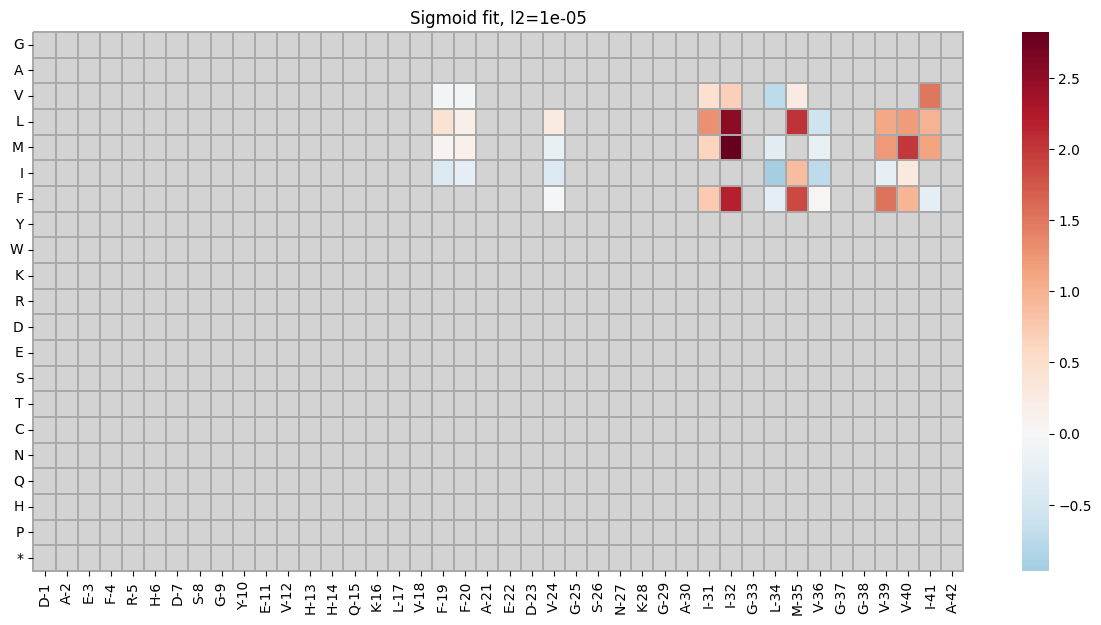

In [17]:
transformation = 'Sigmoid'
fig = plt.figure(figsize=(15, 7))
sns.heatmap(ddE_df_mean_kcalmol[transformation], cmap=cmaps_ddE[transformation], 
            #vmin = ddE_df_mean_kcalmol.fillna(0, inplace=False).to_numpy().min(),
            #vmax = 5,
            mask=masks_ddE[transformation],
            linewidths=0.002814, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title(transformation + ' fit, l2=1e-05')

#plt.savefig('./figures/20240206_mochi_ddEa_heatmap_all_3_doubles_1st_ord_terms_allowed_Sigmoid.pdf',
#           bbox_inches = 'tight')

In [18]:
results_dir_doubles = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/amyloids_energy_modelling/Double_mutants_analysis/all_vars_analysis/mochi_results/'


In [19]:
# here will look runs for all 3 doubles datasets
# Sigmoid, ELU or Linear fits

weights_Nucleation_doubles = {}

for transformation in transformations: 
    print(transformation)
        
    curr_path = results_dir_doubles + '20240219_max_terms_order_1_' + transformation + '_l2_regularization_factor_' + l2_regularisation_factor_value + '_all_3_doubles_datasets_all_variants'       


    weights_Nucleation_doubles[transformation] = pd.read_csv(curr_path + '/weights/weights_Nucleation.txt',
                                sep='\t')

    # add ddEa, bc weights_Nucleation['mean_kcal/mol'] is -ddEa
    weights_Nucleation_doubles[transformation]['ddEa'] = - weights_Nucleation_doubles[transformation]['mean_kcal/mol']


    # final scaling and shifting using Thacker and Yang data
    weights_Nucleation_doubles[transformation]['ddEa_scaled_and_shifted'] = (weights_Nucleation_doubles[transformation]['ddEa'])/0.233
    

Sigmoid


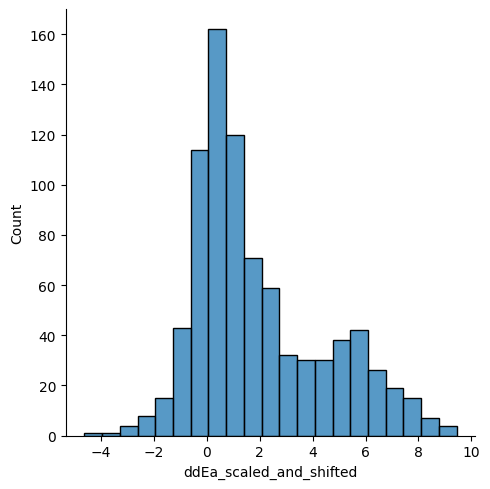

In [20]:
sns.displot(weights_Nucleation_doubles['Sigmoid']['ddEa_scaled_and_shifted'])

In [21]:
# table of all possible 20 aa in all possible Ab (42) positions

ddE_df_mean_kcalmol_doubles = {}

for l2_regularisation_factor_value in l2_regularisation_factor_values:
    for transformation in transformations:
        #print(transformation)
        ddE_df_mean_kcalmol_doubles[transformation] = pd.DataFrame(columns=[elem + '-' + str(idx+1) for idx,elem in enumerate(list(AB_WT))], 
                                                           index = list(all_aa))

In [22]:
# populate the ddE_df table according to weights_Nucleation

for l2_regularisation_factor_value in l2_regularisation_factor_values:
    
    for transformation in transformations:

        for idx in list(weights_Nucleation_doubles[transformation].index):

            curr_mutation_id = weights_Nucleation_doubles[transformation].loc[idx,'id']

            # continue if not WT
            if curr_mutation_id != 'WT':
                # position (1-42) of mutation in Ab sequence
                curr_mutation_pos = curr_mutation_id[1:-1]
                # aa introduced by the mutation
                curr_new_aa = curr_mutation_id[-1]

                # inferred value of ddEa to be added
                curr_ddEa_value = weights_Nucleation_doubles[transformation].loc[idx,'ddEa_scaled_and_shifted']

                # minus because we have -ddEa predicted
                ddE_df_mean_kcalmol_doubles[transformation].loc[curr_new_aa, list(ddE_df_mean_kcalmol_doubles[transformation].columns)[int(curr_mutation_pos) - 1]] = curr_ddEa_value


In [23]:
# make sure values are float
for l2_regularisation_factor_value in l2_regularisation_factor_values:
    for transformation in transformations:
        for col in list(ddE_df_mean_kcalmol_doubles[transformation].columns):
            ddE_df_mean_kcalmol_doubles[transformation][col] = ddE_df_mean_kcalmol_doubles[transformation][col].astype(float)


In [24]:
ddE_df_mean_kcalmol_doubles['Sigmoid']

,D-1,A-2,E-3,F-4,R-5,H-6,D-7,S-8,G-9,Y-10,...,G-33,L-34,M-35,V-36,G-37,G-38,V-39,V-40,I-41,A-42
G,-0.513740,0.257202,-0.524391,0.666902,1.172574,0.538170,-0.379760,0.049165,NaN,-0.152985,...,NaN,5.986507,5.676245,4.148929,NaN,NaN,7.653882,5.714533,6.609346,2.607290
A,-0.147763,NaN,-0.309471,0.506991,1.287016,0.702866,-0.002935,0.284632,0.207127,-0.004661,...,4.130022,3.021727,5.139845,2.753544,4.544543,4.662272,4.888832,5.341470,6.636207,NaN
V,1.982111,1.855294,1.460877,0.918588,1.157460,1.221586,0.994238,0.771720,0.443632,0.402577,...,4.915985,-0.736443,2.057580,NaN,5.517632,4.814599,NaN,NaN,3.502116,-0.692907
L,2.752797,2.418817,2.271359,1.141775,1.614956,1.857726,1.097659,0.690486,1.289209,1.344692,...,4.021306,NaN,4.457238,-0.312345,9.256260,7.166352,2.478533,3.498711,2.456996,-2.662287
M,0.842132,1.169468,0.299724,0.630338,1.108589,0.808810,0.214325,0.265724,0.507249,0.897652,...,1.389000,0.231609,NaN,0.241387,8.272791,5.801625,2.405861,3.846833,2.855504,-2.056350
I,2.590310,2.172209,1.549483,0.781311,1.236310,1.819976,1.013811,1.108447,0.498474,0.629187,...,5.880424,-1.333675,3.044939,-0.821111,7.874150,5.849606,-0.153560,1.797520,NaN,-0.699159
F,0.480155,0.128483,-0.251483,NaN,1.393774,0.853974,0.292976,0.276359,-0.183608,0.121737,...,3.660147,1.174189,6.458651,0.252573,8.604114,6.365029,3.472572,2.487587,-0.379039,-0.178046
Y,0.413142,0.286494,-0.306889,0.345169,1.466453,0.835888,0.280575,0.187702,-0.715327,NaN,...,3.385179,2.567611,4.677266,0.760311,7.686005,7.095736,3.656119,1.228842,0.600879,2.465099
W,0.922289,0.200349,-0.720210,0.783091,1.428499,0.593596,0.121613,0.091317,0.421011,0.730887,...,6.268929,4.903888,5.398989,5.417723,8.997745,8.403956,6.797007,6.457193,2.663495,3.812609
K,0.189033,0.366360,-0.134040,0.965446,0.359003,0.588470,-0.033936,0.370751,-0.074992,0.295757,...,2.146400,2.764652,6.952580,3.058778,9.440661,2.968813,4.141772,6.916764,4.723069,4.234715


Text(0.5, 1.0, 'Sigmoid fit, l2=1e-05')

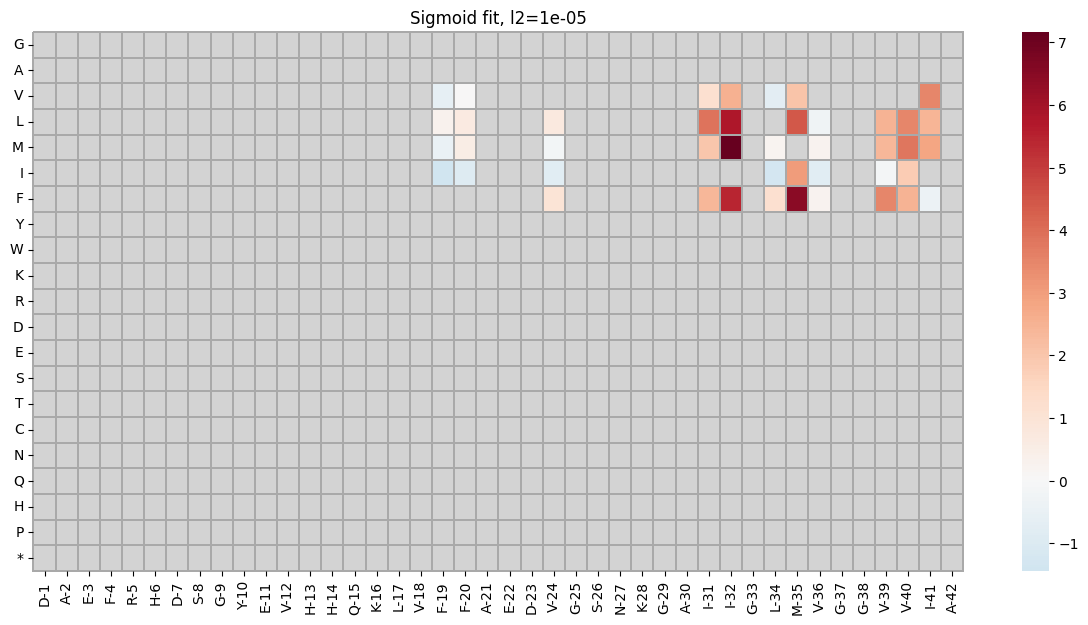

In [25]:
transformation = 'Sigmoid'
fig = plt.figure(figsize=(15, 7))
sns.heatmap(ddE_df_mean_kcalmol_doubles[transformation], 
            cmap=cmaps_ddE[transformation], 
            #vmin = ddE_df_mean_kcalmol_doubles[transformation].fillna(0, inplace=False).to_numpy().min(),
            #vmax = ddE_df_mean_kcalmol_doubles[transformation].fillna(0, inplace=False).to_numpy().max(),
            mask=masks_ddE[transformation],
            linewidths=0.002814, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title(transformation + ' fit, l2=1e-05')

#plt.savefig('./figures/20240206_mochi_ddEa_heatmap_all_3_doubles_1st_ord_terms_allowed_Sigmoid.pdf',
#           bbox_inches = 'tight')

In [26]:
# overlap in variants b/w DTS and doubles
common_vars_sigmoid = list(set(weights_Nucleation_doubles['Sigmoid']['id']) & set(weights_Nucleation['Sigmoid']['id']))
len(common_vars_sigmoid)

45

In [27]:
# doubles
x = list(weights_Nucleation_doubles['Sigmoid'].set_index('id', inplace=False).loc[common_vars_sigmoid,'ddEa_scaled_and_shifted'])


# DTS01 and DTS05
y = list(weights_Nucleation['Sigmoid'].set_index('id', inplace=False).loc[common_vars_sigmoid,'ddEa'])



In [28]:
scipy.stats.pearsonr(x,y)

PearsonRResult(statistic=0.9567705543610968, pvalue=1.0923367659873001e-24)

Text(0.5, 1.0, 'corr=0.9567705543610965')

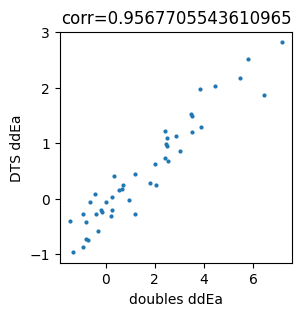

In [29]:
labels = common_vars_sigmoid

fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(x, y, s=4)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('doubles ddEa')
plt.ylabel('DTS ddEa')
plt.title('corr=' + str(np.corrcoef(x, y)[0][1]))


#for i, txt in enumerate(mutations):
#    ax.annotate(txt, (x[i], y[i]), fontsize=10)

# Because WT was added into DTS datasets artificially before running mochi, I need to rescale DTS values

### using the slope and intercept values from linear regression fit b/w doubles and DTS first order ddEa terms

In [30]:
# using Sigmoid results

In [31]:
len(common_vars_sigmoid)

45

In [32]:
# our x
ddEa_doubles = list(weights_Nucleation_doubles['Sigmoid'].set_index('id', inplace=False).loc[common_vars_sigmoid,'ddEa_scaled_and_shifted'])

# our y
ddEa_DTS = list(weights_Nucleation['Sigmoid'].set_index('id', inplace=False).loc[common_vars_sigmoid,'ddEa'])


In [33]:
# fit linear model, calculate slope and intercept values
linear_fit = LinearRegression().fit([[elem] for elem in ddEa_doubles], ddEa_DTS) # (X,y)
intercept_value = linear_fit.intercept_
slope_value = linear_fit.coef_

In [34]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c='red')

In [35]:
slope_value

array([0.41604357])

In [36]:
intercept_value

-0.15589508632224613

Text(0, 0.5, 'ddEa, DTS')

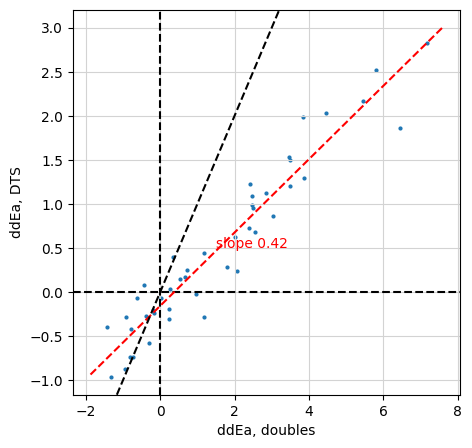

In [37]:
# INITIAL DATA

f, ax = plt.subplots(figsize=(5,5))

ax.scatter(x, y, s=4)

plt.grid(color='lightgrey')
#plt.xlim(-2,2)
#plt.ylim(-2,2)


plt.axhline(linestyle='--', color='black')
plt.axvline(linestyle='--', color='black')
abline(slope_value, intercept_value) # in red
plt.axline((0,0), slope=1, linestyle='--', color='black')

plt.text(x = 1.5, y = 0.5, s = 'slope ' + str(np.round(slope_value[0],2)), c='red')



plt.xlabel('ddEa, doubles')
plt.ylabel('ddEa, DTS')


In [38]:
# scaling and recentering data

weights_Nucleation['Sigmoid']['ddEa_recentered'] = (weights_Nucleation['Sigmoid']['ddEa'] - intercept_value)/slope_value


In [39]:
np.mean(weights_Nucleation['Sigmoid']['ddEa_recentered'])

0.33822378587926677

In [40]:
np.min(weights_Nucleation['Sigmoid'][45:]['ddEa_recentered'])

-4.469692000309399

In [41]:
np.max(weights_Nucleation['Sigmoid'][45:]['ddEa_recentered'])

3.557299993015806

Text(0, 0.5, 'ddEa, DTS (recentered)')

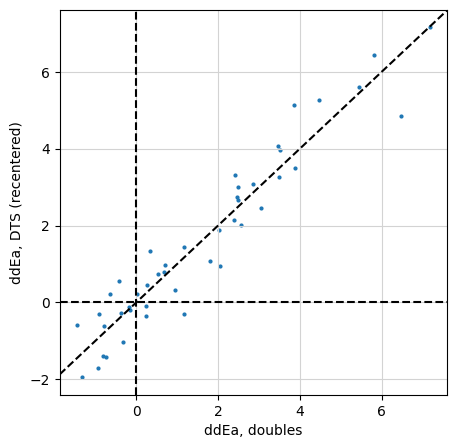

In [42]:
# RECENTERED DATA (lifting it up by the intercept value calculated above)

f, ax = plt.subplots(figsize=(5,5))

ax.scatter(x, (y-intercept_value)/slope_value, s=4)

plt.grid(color='lightgrey')
#plt.xlim(-2,2)
#plt.ylim(-2,2)


plt.axhline(linestyle='--', color='black')
plt.axvline(linestyle='--', color='black')
#abline(slope_value, intercept_value)
plt.axline((0,0), slope=1, linestyle='--', color='black')

#plt.text(x = 1.5, y = 0.5, s = 'slope ' + str(np.round(slope[0],2)), c='red')



plt.xlabel('ddEa, doubles')
plt.ylabel('ddEa, DTS (recentered)')


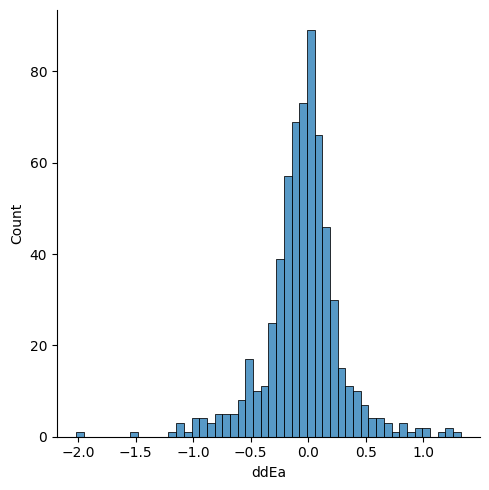

In [43]:
sns.displot(weights_Nucleation['Sigmoid'][45:]['ddEa'])

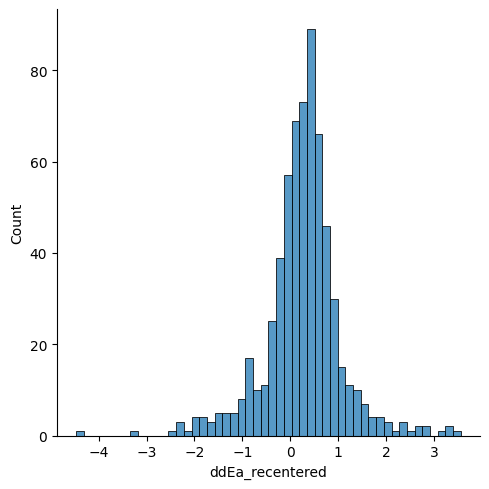

In [44]:
sns.displot(weights_Nucleation['Sigmoid'][45:]['ddEa_recentered'])

In [45]:
np.median(weights_Nucleation['Sigmoid'][45:]['ddEa'])

-0.030830494

In [46]:
np.median(weights_Nucleation['Sigmoid'][45:]['ddEa_recentered'])

0.3006045557185154

In [47]:
weights_Nucleation['Sigmoid']['std_scaled'] = weights_Nucleation['Sigmoid']['std_kcal/mol']/(slope_value)

In [48]:
weights_Nucleation['Sigmoid'][45:]

,id,id_ref,Pos,Pos_ref,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,...,mean,std,ci95,trait_name,mean_kcal/mol,std_kcal/mol,ci95_kcal/mol,ddEa,ddEa_recentered,std_scaled
45,V36L_V40M,V36L_V40M,36_40,36_40,-0.007173,0.308364,-0.107993,-0.272195,-0.201784,-0.379566,...,-0.169164,0.213807,0.838125,Nucleation,-0.101847,0.128725,0.504602,0.101847,0.619507,0.309403
46,I31V_I41V,I31V_I41V,31_41,31_41,-0.285702,-0.127356,-0.068321,-0.074500,-0.288390,-0.105110,...,-0.155999,0.099805,0.391237,Nucleation,-0.093921,0.060089,0.235548,0.093921,0.600456,0.144429
47,F19I_F20V,F19I_F20V,19_20,19_20,-0.204647,0.066053,0.290241,0.033616,0.044246,-0.093565,...,-0.005613,0.137510,0.539038,Nucleation,-0.003379,0.082789,0.324534,0.003379,0.382831,0.198992
48,M35I_V40L,M35I_V40L,35_40,35_40,-1.838146,-1.267114,-1.587382,-0.874730,-1.422868,-1.258638,...,-1.499219,0.328204,1.286558,Nucleation,-0.902621,0.197599,0.774586,0.902621,2.544244,0.474947
49,I31F_V40L,I31F_V40L,31_40,31_40,-0.936283,-1.122599,-1.695565,-1.047511,-1.479724,-1.050488,...,-1.063711,0.327143,1.282401,Nucleation,-0.640419,0.196960,0.772084,0.640419,1.914015,0.473412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,F20V_L34F,F20V_L34F,20_34,20_34,0.297921,0.329733,0.396647,0.148138,0.351929,0.206056,...,0.333239,0.116632,0.457198,Nucleation,0.200630,0.070220,0.275261,-0.200630,-0.107525,0.168780
681,L34M_V36I,L34M_V36I,34_36,34_36,-0.093798,-0.093373,-0.094947,-0.130022,-0.255219,-0.146849,...,-0.148600,0.124256,0.487082,Nucleation,-0.089466,0.074809,0.293253,0.089466,0.589749,0.179812
682,I31M_V40M,I31M_V40M,31_40,31_40,0.347809,0.154206,0.092261,0.251844,0.468843,0.331124,...,0.274393,0.121982,0.478168,Nucleation,0.165201,0.073440,0.287886,-0.165201,-0.022368,0.176521
683,I32M_L34F,I32M_L34F,32_34,32_34,-0.894396,-0.766055,-0.524387,-0.299532,-0.329063,-0.572234,...,-0.469320,0.230045,0.901778,Nucleation,-0.282559,0.138501,0.542925,0.282559,1.053866,0.332901


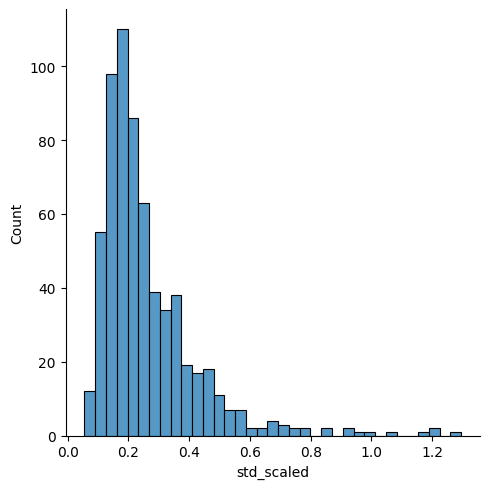

In [49]:
sns.displot(weights_Nucleation['Sigmoid'][45:]['std_scaled'])

In [50]:
np.median(weights_Nucleation['Sigmoid'][45:]['ddEa_recentered'])

0.3006045557185154

# Adding how many times a pair of mutations is measured

In [62]:
# counting how many times a mutation is measured in different genetic backgrounds 
# (all variants across the 2 doubles datasets without duplicates)

In [63]:
all_variants['DTS01']['aa_seq'].value_counts()

aa_seq
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGIIIGGMLLA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAFIGMLLGGLIVA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAFIGMLVGGVFLA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAFIGMLVGGVLIA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAFIGMLVGGVVFA    1
                                             ..
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAVIGVIIGGVMLA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAVIGVIIGGVVVA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAVIGVIIGGVLLA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAVIGVIMGGIFMA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA    1
Name: count, Length: 37671, dtype: int64

In [64]:
all_variants['DTS05']['aa_seq'].value_counts()

aa_seq
DAEFRHDSGYEVHHQKLVIIAEDIGSNKGAIIGMMVGGVVIA    1
DAEFRHDSGYEVHHQKLVFVAEDMGSNKGAMMGFMVGGVVIA    1
DAEFRHDSGYEVHHQKLVFVAEDMGSNKGAILGLMVGGVVIA    1
DAEFRHDSGYEVHHQKLVFVAEDMGSNKGAIFGMMVGGVVIA    1
DAEFRHDSGYEVHHQKLVFVAEDIGSNKGALFGLMVGGVVIA    1
                                             ..
DAEFRHDSGYEVHHQKLVVMAEDVGSNKGAFVGIMVGGVVIA    1
DAEFRHDSGYEVHHQKLVVMAEDVGSNKGAFVGFMVGGVVIA    1
DAEFRHDSGYEVHHQKLVVMAEDVGSNKGAFMGFMVGGVVIA    1
DAEFRHDSGYEVHHQKLVVMAEDVGSNKGAFIGVMVGGVVIA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA    1
Name: count, Length: 5283, dtype: int64

In [65]:
# without duplicates
all_variants_list = list(all_variants['DTS01']['aa_seq']) + list(all_variants['DTS05']['aa_seq'])
all_variants_list = np.unique(all_variants_list)

In [66]:
len(all_variants_list)

42928

In [67]:
# add 3 columns to weights_Nucleation with the number of times this particular mutation occurs in a given doubles dataset (eLife, NNK, Nicking)

def add_occurence_no_duplicates(mut_id, # from weights_Nucleation['Sigmoid_l2_1e-05']['id'])
                               ):
    
    if mut_id == 'WT':
        return(0)
    
    else:
        # this is position - 1 to match python indices starting with 0
        
        mut_id_1 = mut_id.split('_')[0]
        mut_id_2 = mut_id.split('_')[1]
        
        curr_pos_1 = int(mut_id_1[1:-1]) - 1
        curr_pos_2 = int(mut_id_2[1:-1]) - 1

        curr_new_aa_1 = mut_id_1[-1]
        curr_new_aa_2 = mut_id_2[-1]

        count = 0

        for aa_variant in all_variants_list:
            #print(aa_variant)
            if (aa_variant[curr_pos_1] == curr_new_aa_1) & (aa_variant[curr_pos_2] == curr_new_aa_2):
                count = count + 1
        
        return(count)

    
    


In [68]:
weights_Nucleation_2nd_order['variant_occurence_total_no_duplicates'] = weights_Nucleation_2nd_order['id'].apply(lambda x: add_occurence_no_duplicates(x))


In [71]:
np.median(weights_Nucleation_2nd_order['variant_occurence_total'])

1024.0

In [72]:
np.median(weights_Nucleation_2nd_order['variant_occurence_total_no_duplicates'])

1024.0

/tmp/ipykernel_2483597/407319623.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights_Nucleation_2nd_order['ddEa_recentered'], bins=70)


<Axes: xlabel='ddEa_recentered', ylabel='Density'>

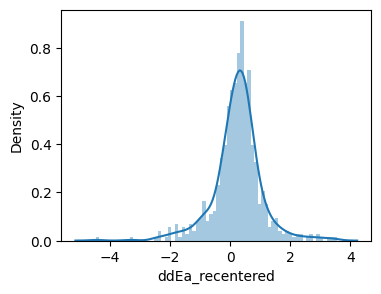

In [73]:
fig = plt.figure(figsize=(4, 3))

sns.distplot(weights_Nucleation_2nd_order['ddEa_recentered'], bins=70)

#plt.savefig('./figures/20240718_dddEa_heatmap_all_640_values.pdf',
#           bbox_inches = 'tight')

In [74]:
np.median(weights_Nucleation_2nd_order['ddEa_recentered'])

0.3006045557185154

In [75]:
np.mean(weights_Nucleation_2nd_order['ddEa_recentered'])

0.2505701707139242

In [76]:
scipy.stats.mode(weights_Nucleation_2nd_order['ddEa_recentered'])

ModeResult(mode=-4.469692000309399, count=1)

In [79]:
len(weights_Nucleation_2nd_order[abs(weights_Nucleation_2nd_order['ddEa_recentered']) < 1])

535

In [80]:
len(weights_Nucleation_2nd_order)

640

In [81]:
len(weights_Nucleation_2nd_order[abs(weights_Nucleation_2nd_order['ddEa_recentered']) < 1])/len(weights_Nucleation_2nd_order)

0.8359375

In [83]:
len(weights_Nucleation_2nd_order[weights_Nucleation_2nd_order['ddEa_recentered'] > 2])

15

In [84]:
len(weights_Nucleation_2nd_order[weights_Nucleation_2nd_order['ddEa_recentered'] < -2])

9

In [86]:
(len(weights_Nucleation_2nd_order[weights_Nucleation_2nd_order['ddEa_recentered'] > 2]) + len(weights_Nucleation_2nd_order[weights_Nucleation_2nd_order['ddEa_recentered'] < -2]))/len(weights_Nucleation_2nd_order)

0.0375

In [87]:
weights_Nucleation['Sigmoid'].columns

Index(['id', 'id_ref', 'Pos', 'Pos_ref', 'fold_1', 'fold_2', 'fold_3',
       'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9', 'fold_10',
       'n', 'mean', 'std', 'ci95', 'trait_name', 'mean_kcal/mol',
       'std_kcal/mol', 'ci95_kcal/mol', 'ddEa', 'ddEa_recentered',
       'std_scaled'],
      dtype='object')

In [88]:
weights_Nucleation2save = weights_Nucleation['Sigmoid'].loc[:,['id', 'id_ref', 'Pos', 'Pos_ref', 'fold_1', 'fold_2', 'fold_3',
       'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9', 'fold_10',
       'n', 'mean', 'std', 'ci95', 'trait_name', 'mean_kcal/mol',
       'std_kcal/mol', 'ci95_kcal/mol','ddEa_recentered', 'std_scaled']]

weights_Nucleation2save.columns = ['id', 'id_ref', 'Pos', 'Pos_ref', 'fold_1', 'fold_2', 'fold_3',
       'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9', 'fold_10',
       'n', 'mean', 'std', 'ci95', 'trait_name', 'mean_kcal/mol',
       'std_kcal/mol', 'ci95_kcal/mol','ddEa_scaled', 'std_scaled']

### Visualising ddEa values

In [89]:
# table of all possible 20 aa in all possible Ab (42) positions

AB_WT = "DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA"
all_aa = ["G","A","V","L","M","I","F","Y","W","K","R","D","E","S","T","C","N","Q","H", "P", "*"]

ddE_df_mean_kcalmol = {}

for l2_regularisation_factor_value in l2_regularisation_factor_values:
    for transformation in transformations:
        #print(transformation)
        ddE_df_mean_kcalmol[transformation] = pd.DataFrame(columns=[elem + '-' + str(idx+1) for idx,elem in enumerate(list(AB_WT))], 
                                                           index = list(all_aa))

In [90]:
ddE_df_mean_kcalmol['Sigmoid'].head()

,D-1,A-2,E-3,F-4,R-5,H-6,D-7,S-8,G-9,Y-10,...,G-33,L-34,M-35,V-36,G-37,G-38,V-39,V-40,I-41,A-42
G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# populate the ddE_df table according to weights_Nucleation

for l2_regularisation_factor_value in l2_regularisation_factor_values:
    
    for transformation in transformations:

        for idx in list(weights_Nucleation[transformation].index):

            curr_mutation_id = weights_Nucleation[transformation].loc[idx,'id']

            # continue if only 1 mutation
            if '_' not in curr_mutation_id:
                
                # continue if not WT
                if curr_mutation_id != 'WT':
                    # position (1-42) of mutation in Ab sequence
                    curr_mutation_pos = curr_mutation_id[1:-1]
                    # aa introduced by the mutation
                    curr_new_aa = curr_mutation_id[-1]

                    # inferred value of ddEa to be added
                    curr_ddEa_value = weights_Nucleation[transformation].loc[idx,'ddEa_recentered']
                    
                    ddE_df_mean_kcalmol[transformation].loc[curr_new_aa, list(ddE_df_mean_kcalmol[transformation].columns)[int(curr_mutation_pos) - 1]] = curr_ddEa_value


In [92]:
ddE_df_mean_kcalmol['Sigmoid'] = ddE_df_mean_kcalmol['Sigmoid'].dropna(axis=1, how='all')
ddE_df_mean_kcalmol['Sigmoid'] = ddE_df_mean_kcalmol['Sigmoid'].dropna(axis=0, how='all')

In [93]:
# add mean and put it at the top
previous_rows = list(ddE_df_mean_kcalmol['Sigmoid'].index)
ddE_df_mean_kcalmol['Sigmoid'].loc['mean'] = ddE_df_mean_kcalmol['Sigmoid'].mean()
ddE_df_mean_kcalmol['Sigmoid'] = ddE_df_mean_kcalmol['Sigmoid'].loc[['mean'] + previous_rows]

In [94]:
# make sure values are float
for l2_regularisation_factor_value in l2_regularisation_factor_values:
    for transformation in transformations:
        for col in list(ddE_df_mean_kcalmol[transformation].columns):
            ddE_df_mean_kcalmol[transformation][col] = ddE_df_mean_kcalmol[transformation][col].astype(float)


In [95]:
cmaps_ddE = {}
masks_ddE = {}

for l2_regularisation_factor_value in l2_regularisation_factor_values:
    for transformation in transformations:
        #print(transformation)
        masks_ddE[transformation] = ddE_df_mean_kcalmol[transformation].isnull()

        cmaps_ddE[transformation] = matplotlib.colormaps.get('RdBu_r')
        cmaps_ddE[transformation].set_bad("lightgrey")

Text(0.5, 1.0, 'Sigmoid fit, l2=1e-05')

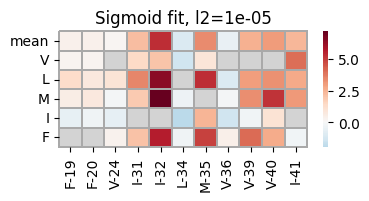

In [96]:
transformation = 'Sigmoid'
fig = plt.figure(figsize=(4, 1.5))
sns.heatmap(ddE_df_mean_kcalmol[transformation], cmap=cmaps_ddE[transformation], 
            #vmin = ddE_df_mean_kcalmol.fillna(0, inplace=False).to_numpy().min(),
            #vmax = 5,
            mask=masks_ddE[transformation],
            linewidths=0.01, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title(transformation + ' fit, l2=1e-05')

#plt.savefig('./figures/20240722_mochi_ddEa_heatmap_DTS01_DTS05_Sigmoid.pdf',
#           bbox_inches = 'tight')

In [97]:
ddE_df_mean_kcalmol['Sigmoid']

,F-19,F-20,V-24,I-31,I-32,L-34,M-35,V-36,V-39,V-40,I-41
mean,0.386715,0.359852,0.143280,2.236538,5.304286,-1.002319,3.381489,-0.512407,2.544254,3.036031,2.378796
V,0.222810,0.212907,NaN,1.443212,2.016174,-1.407150,0.955069,NaN,NaN,NaN,3.971329
L,1.346387,0.789202,0.982877,3.484871,6.443517,NaN,5.263085,-1.016368,2.998229,3.262866,2.743163
M,0.563931,0.735690,-0.115670,1.882780,7.157659,-0.362424,NaN,-0.096644,3.322527,5.143966,3.071331
I,-0.586268,-0.298392,-0.622694,NaN,NaN,-1.944898,2.453126,-1.387910,-0.207266,1.071587,NaN
F,NaN,NaN,0.328609,2.135290,5.599792,-0.294806,4.854676,0.451295,4.063525,2.665707,-0.270641


## Working with PDB - visualise mean ddEa value per residue (from combinatorial MoCHI model)

##### Rewriting the last column in PDB file (called B-factor) for monomer files and colour by it in pymol

- What/where B-factor is: https://proteinstructures.com/structure/protein-databank/
- How to colour by B-factor in PyMOL: https://pymolwiki.org/index.php/Advanced_Coloring#Assign_color_by_B-factor


In [102]:
mean_for_PDB = list(ddE_df_mean_kcalmol['Sigmoid'].loc['mean'])

In [103]:
mean_for_PDB

[0.38671491564181565,
 0.35985195026148825,
 0.14328038747531985,
 2.236538405795001,
 5.304285654026613,
 -1.0023194850364268,
 3.38148916359882,
 -0.5124067691126952,
 2.544253779696375,
 3.0360313543925255,
 2.3787958683807062]

In [104]:
# making a frankenstein vector to fill in the gaps
mean_for_PDB_full = [0]*18 + mean_for_PDB[:2] + [0]*3 + [mean_for_PDB[2]] + [0]*6 + mean_for_PDB[3:5] + [0] + mean_for_PDB[5:8] + [0]*2 + mean_for_PDB[8:11] + [0]


In [105]:
len(mean_for_PDB_full)

42

In [106]:
structures = ['2beg', '2mxu', '2nao', '5kk3',
              '5oqv', '7q4b', '7q4m', '8ezd', '8eze']

In [107]:
# read in monomer pdb files, created in PyMOL and then manually resaved into .csv

pdb_files_monomer = {}

pdb_lines = {}

for run in structures:
    print(run) 
    
    if run == '7q4m':
        pdb_files_monomer[run] = pd.read_csv('/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/amyloids_energy_modelling/Phi_analysis/Single_4_stack_filament_analysis/7q4m/7q4m_monomer_G.csv', sep='\t', header=None)
    
    else:
        if run == '7q4b':
            curr_path = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/amyloids_energy_modelling/Phi_analysis/Single_4_stack_filament_analysis/' + run + '/'

        else:
            curr_path = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/amyloids_energy_modelling/Phi_analysis/Single_4_stack_filament_analysis/other_structures/' + run + '/'

        pdb_files_monomer[run] = pd.read_csv(curr_path + run + '_monomer.csv', sep='\t', header=None)

    # make a list of pdb lines 
    pdb_lines[run] = [pdb_files_monomer[run].loc[idx,0] for idx in list(pdb_files_monomer[run].index)]
    
    #for row in list(pdb_files_monomer[run].index):
        
    

2beg
2mxu
2nao
5kk3
5oqv
7q4b
7q4m
8ezd
8eze


In [108]:
# using all mutations and average phi value

# the B-factor values are the only ones with 2 decimals
# find the values and replace with colormap values

pdb_lines_w_phi_min_abs_ddG = {}

for run in structures:
    print(run)
    
    pdb_lines_w_phi_min_abs_ddG[run] = []
    
    for i in range(len(pdb_lines[run])):
        curr_pdb_line = pdb_lines[run][i]
        
        #print(curr_pdb_line)
        
        # only proceed if the line starts with 'ATOM'
        curr_beginning = curr_pdb_line.split()[0]
        if curr_beginning == 'ATOM':
            
            #curr_position_id_in_Ab = curr_pdb_line.split()[5]
            
            curr_position_id_in_Ab = curr_pdb_line[23:26]
            
            #print(curr_position_id_in_Ab)

            # this operation makes 99.0 out of 99.00 so adding an extra round 
            curr_B_factor = curr_pdb_line[60:66] #curr_pdb_line.split()[-2]
            
            # with this value, trying average for now
            # here the index is 8 (pos-1) for pos 9 (pos) bc enumeration starts with 0
            curr_phi_value = np.round(mean_for_PDB_full[int(curr_position_id_in_Ab)-1],2) #per_position_phi_values_average[run][int(curr_position_id_in_Ab)-1]

            curr_phi_value = str(curr_phi_value)
            
            # if it's a value like 0.4 (without 2nd decimal point), need to add 0 at the end
            # otherwise pymol representation will break in a weird way (introduce gaps)
            
            if str(curr_phi_value) != 'nan':
            
                if len(str(curr_phi_value)) == 3:
                    old_curr_phi_value = curr_phi_value
                    curr_phi_value = str(curr_phi_value) + '0'
                    #print('making', old_curr_phi_value, 'into', curr_phi_value)

                #curr_new_pdb_line = curr_pdb_line.replace(curr_B_factor, curr_phi_value)
                #pdb_lines_w_phi_min_abs_ddG[run].append(curr_new_pdb_line)
                curr_new_pdb_line = curr_pdb_line[:60] + ' '*(6-len(curr_phi_value)) + curr_phi_value + curr_pdb_line[66:] #curr_pdb_line.replace(curr_B_factor, curr_phi_value)
                pdb_lines_w_phi_min_abs_ddG[run].append(curr_new_pdb_line)
            
            
            # if nan, put 0 there to be sure we don't skew the [-1,1] range
            else:
                curr_new_pdb_line = curr_pdb_line.replace(' ' + curr_B_factor + ' ', ' 00.00 ') # was 100.00 with PyMOL
                pdb_lines_w_phi_min_abs_ddG[run].append(curr_new_pdb_line)
        
            
        else:    
            pdb_lines_w_phi_min_abs_ddG[run].append(curr_pdb_line)
            
    
    

    


2beg
2mxu
2nao
5kk3
5oqv
7q4b
7q4m
8ezd
8eze


In [109]:
print(pd.DataFrame(index = [i+1 for i in range(len(mean_for_PDB_full))],
             data = {'mean_ddEa': mean_for_PDB_full}) )


    mean_ddEa
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
10   0.000000
11   0.000000
12   0.000000
13   0.000000
14   0.000000
15   0.000000
16   0.000000
17   0.000000
18   0.000000
19   0.386715
20   0.359852
21   0.000000
22   0.000000
23   0.000000
24   0.143280
25   0.000000
26   0.000000
27   0.000000
28   0.000000
29   0.000000
30   0.000000
31   2.236538
32   5.304286
33   0.000000
34  -1.002319
35   3.381489
36  -0.512407
37   0.000000
38   0.000000
39   2.544254
40   3.036031
41   2.378796
42   0.000000


In [110]:
curr_min = np.min([elem for elem in mean_for_PDB_full if str(elem) != 'nan'])
curr_max = np.max([elem for elem in mean_for_PDB_full if str(elem) != 'nan'])
print(curr_min, curr_max)

-1.0023194850364268 5.304285654026613


In [111]:
# write file and try to open in pymol

for run in structures:
    print(run)
    
    with open('./files/' + run + '_monomer_with_mean_ddEa_from_DTS01_DTS05_model_scaled.pdb', 'a') as file:
        for line in pdb_lines_w_phi_min_abs_ddG[run]:
            file.write(line + '\n')

2beg
2mxu
2nao
5kk3
5oqv
7q4b
7q4m
8ezd
8eze


## Visualise per residue interaction maps

In [112]:
# continuing to work with Sigmoid results
weights_Nucleation = weights_Nucleation['Sigmoid'].copy()


In [113]:
# copy of weights_Nucleation with ONLY 2nd order terms
ids_2nd_order = [idx for idx in list(weights_Nucleation['id']) if '_' in idx]
weights_Nucleation_2nd_order = weights_Nucleation.set_index('id', inplace=False).loc[ids_2nd_order,:].reset_index()

In [114]:
weights_Nucleation_2nd_order

,id,id_ref,Pos,Pos_ref,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,...,mean,std,ci95,trait_name,mean_kcal/mol,std_kcal/mol,ci95_kcal/mol,ddEa,ddEa_recentered,std_scaled
0,V36L_V40M,V36L_V40M,36_40,36_40,-0.007173,0.308364,-0.107993,-0.272195,-0.201784,-0.379566,...,-0.169164,0.213807,0.838125,Nucleation,-0.101847,0.128725,0.504602,0.101847,0.619507,0.309403
1,I31V_I41V,I31V_I41V,31_41,31_41,-0.285702,-0.127356,-0.068321,-0.074500,-0.288390,-0.105110,...,-0.155999,0.099805,0.391237,Nucleation,-0.093921,0.060089,0.235548,0.093921,0.600456,0.144429
2,F19I_F20V,F19I_F20V,19_20,19_20,-0.204647,0.066053,0.290241,0.033616,0.044246,-0.093565,...,-0.005613,0.137510,0.539038,Nucleation,-0.003379,0.082789,0.324534,0.003379,0.382831,0.198992
3,M35I_V40L,M35I_V40L,35_40,35_40,-1.838146,-1.267114,-1.587382,-0.874730,-1.422868,-1.258638,...,-1.499219,0.328204,1.286558,Nucleation,-0.902621,0.197599,0.774586,0.902621,2.544244,0.474947
4,I31F_V40L,I31F_V40L,31_40,31_40,-0.936283,-1.122599,-1.695565,-1.047511,-1.479724,-1.050488,...,-1.063711,0.327143,1.282401,Nucleation,-0.640419,0.196960,0.772084,0.640419,1.914015,0.473412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,F20V_L34F,F20V_L34F,20_34,20_34,0.297921,0.329733,0.396647,0.148138,0.351929,0.206056,...,0.333239,0.116632,0.457198,Nucleation,0.200630,0.070220,0.275261,-0.200630,-0.107525,0.168780
636,L34M_V36I,L34M_V36I,34_36,34_36,-0.093798,-0.093373,-0.094947,-0.130022,-0.255219,-0.146849,...,-0.148600,0.124256,0.487082,Nucleation,-0.089466,0.074809,0.293253,0.089466,0.589749,0.179812
637,I31M_V40M,I31M_V40M,31_40,31_40,0.347809,0.154206,0.092261,0.251844,0.468843,0.331124,...,0.274393,0.121982,0.478168,Nucleation,0.165201,0.073440,0.287886,-0.165201,-0.022368,0.176521
638,I32M_L34F,I32M_L34F,32_34,32_34,-0.894396,-0.766055,-0.524387,-0.299532,-0.329063,-0.572234,...,-0.469320,0.230045,0.901778,Nucleation,-0.282559,0.138501,0.542925,0.282559,1.053866,0.332901


In [117]:
weights_Nucleation.columns

Index(['id_ref', 'Pos', 'Pos_ref', 'fold_1', 'fold_2', 'fold_3', 'fold_4',
       'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9', 'fold_10', 'n',
       'mean', 'std', 'ci95', 'trait_name', 'mean_kcal/mol', 'std_kcal/mol',
       'ci95_kcal/mol', 'ddEa', 'ddEa_recentered', 'std_scaled'],
      dtype='object')

In [118]:
groups_interactions = ['all']

In [122]:
weights_Nucleation['all'] = [1 for i in range(len(weights_Nucleation))]

In [123]:
positions_for_2nd_order_terms = [elem + str(idx+1) for idx,elem in enumerate(list(AB_WT))]
positions_for_2nd_order_terms[:10]

['D1', 'A2', 'E3', 'F4', 'R5', 'H6', 'D7', 'S8', 'G9', 'Y10']

In [124]:
# table of all possible 2nd order terms

ddE_df_2nd_order_terms = {}

for inter_group in groups_interactions:
    ddE_df_2nd_order_terms[inter_group] = {}

    for position_i in positions_for_2nd_order_terms:
        for position_j in positions_for_2nd_order_terms:
            ddE_df_2nd_order_terms[inter_group][position_i + '_' + position_j] = pd.DataFrame(columns = list(all_aa),
                                                                                index = list(all_aa))

In [126]:
for inter_group in groups_interactions:
    
    for mut_id in list(weights_Nucleation.index):
    
        # only working with 2nd order terms
        if '_' in mut_id:
            #print('mut_id:', mut_id)
            curr_mut_id_1 = mut_id.split('_')[0]
            curr_mut_id_2 = mut_id.split('_')[1]

            curr_mut_id_1_WT_pos = curr_mut_id_1[:-1]
            curr_mut_id_1_new_aa = curr_mut_id_1[-1]

            curr_mut_id_2_WT_pos = curr_mut_id_2[:-1]
            curr_mut_id_2_new_aa = curr_mut_id_2[-1]
            
            curr_group_status = weights_Nucleation.loc[mut_id, inter_group]
            
            ddE_df_2nd_order_terms[inter_group][curr_mut_id_1_WT_pos + '_' + curr_mut_id_2_WT_pos].loc[curr_mut_id_1_new_aa, curr_mut_id_2_new_aa] = weights_Nucleation.loc[mut_id, 'ddEa_recentered']


            #print('added value:', ddE_df_2nd_order_terms[curr_mut_id_1_WT_pos + '_' + curr_mut_id_2_WT_pos].loc[curr_mut_id_1_new_aa, curr_mut_id_2_new_aa])


In [127]:
# let's not consider dfs with all nans

empty_dfs_keys = []
not_empty_dfs_keys = []

for mut_combination in list(ddE_df_2nd_order_terms['all'].keys()):
    
    isnull_vector_per_col = np.unique(list(ddE_df_2nd_order_terms['all'][mut_combination].isnull().all()))
    
    if len(isnull_vector_per_col) == 1 & (isnull_vector_per_col[0] == True):
        empty_dfs_keys.append(mut_combination)
    else:
        not_empty_dfs_keys.append(mut_combination)
    

In [128]:
len(empty_dfs_keys)

1724

In [129]:
len(list(ddE_df_2nd_order_terms['all'].keys()))

1764

In [130]:
len(list(ddE_df_2nd_order_terms['all'].keys())) - len(empty_dfs_keys)

40

In [131]:
len(not_empty_dfs_keys)

40

In [132]:
# make sure values are float
for inter_group in groups_interactions:
    for mut_combination in not_empty_dfs_keys:
        for col in ddE_df_2nd_order_terms[inter_group][mut_combination].columns:
            ddE_df_2nd_order_terms[inter_group][mut_combination][col] = ddE_df_2nd_order_terms[inter_group][mut_combination][col].astype(float)


In [133]:
cmap_ddE_2nd_order_terms = matplotlib.colormaps.get('RdBu_r')
cmap_ddE_2nd_order_terms.set_bad("lightgrey")

masks_ddE_2nd_order_terms = {}


for inter_group in groups_interactions:
    masks_ddE_2nd_order_terms[inter_group] = {}
    
    for mut_combination in not_empty_dfs_keys:
        masks_ddE_2nd_order_terms[inter_group][mut_combination] = ddE_df_2nd_order_terms[inter_group][mut_combination].isnull()

In [134]:
not_empty_dfs_keys

['F19_F20',
 'F19_V24',
 'F19_I31',
 'F19_I32',
 'F19_L34',
 'F20_V24',
 'F20_I31',
 'F20_I32',
 'F20_L34',
 'V24_I31',
 'V24_I32',
 'V24_L34',
 'I31_I32',
 'I31_L34',
 'I31_M35',
 'I31_V36',
 'I31_V39',
 'I31_V40',
 'I31_I41',
 'I32_L34',
 'I32_M35',
 'I32_V36',
 'I32_V39',
 'I32_V40',
 'I32_I41',
 'L34_M35',
 'L34_V36',
 'L34_V39',
 'L34_V40',
 'L34_I41',
 'M35_V36',
 'M35_V39',
 'M35_V40',
 'M35_I41',
 'V36_V39',
 'V36_V40',
 'V36_I41',
 'V39_V40',
 'V39_I41',
 'V40_I41']

In [135]:
len(not_empty_dfs_keys)

40

/tmp/ipykernel_2483597/1193074484.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(5, 4.5))


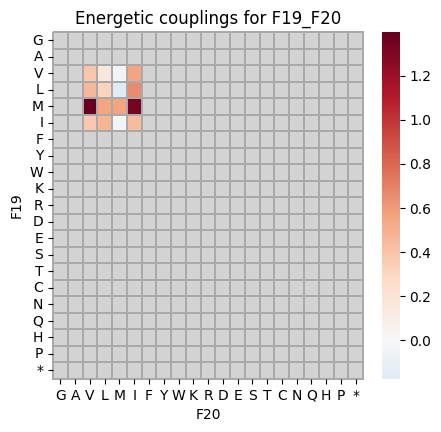

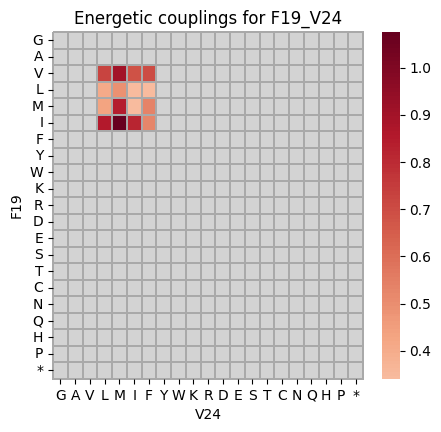

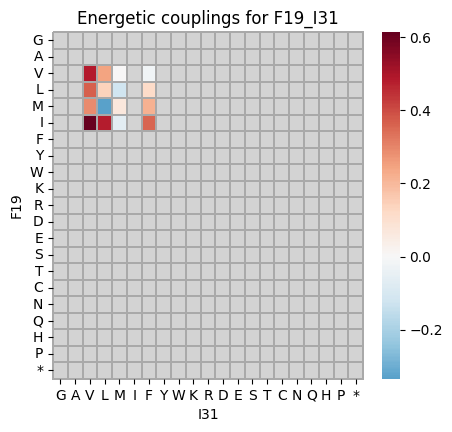

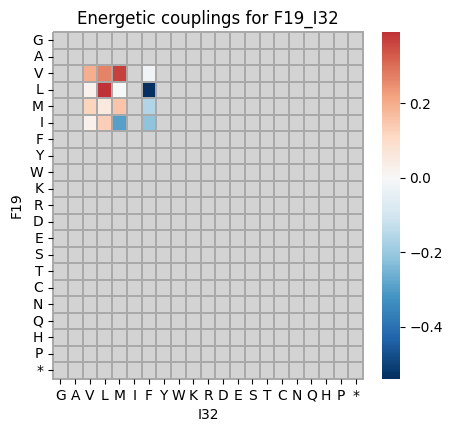

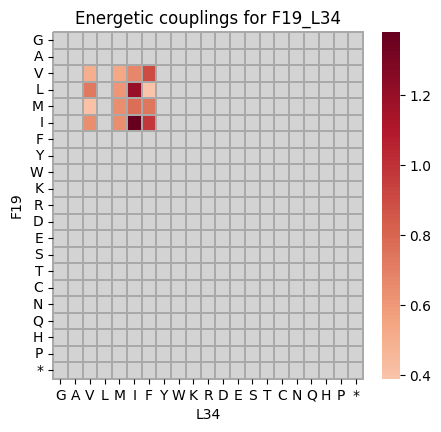

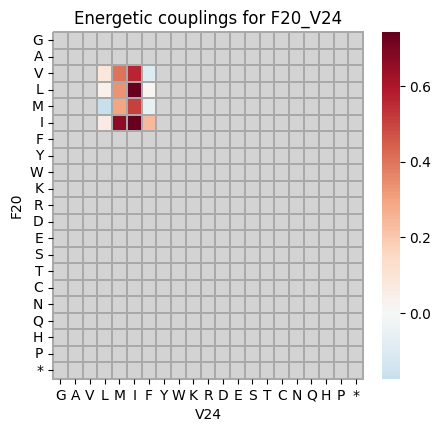

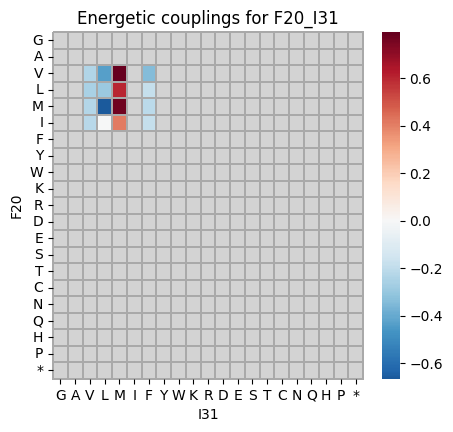

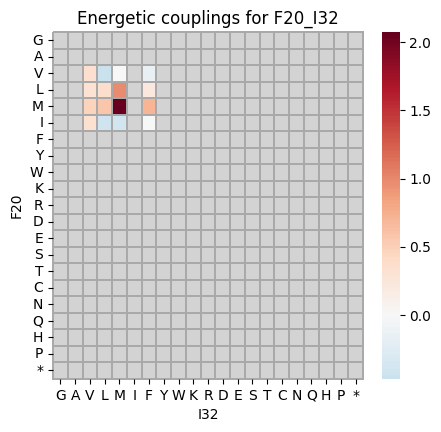

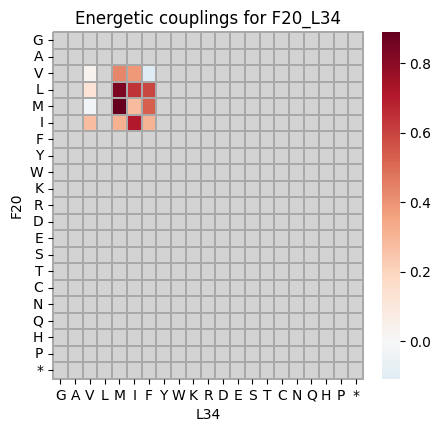

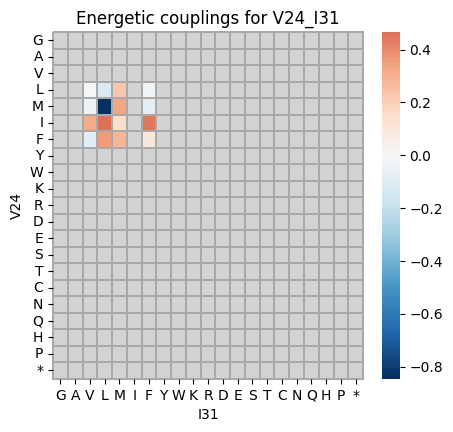

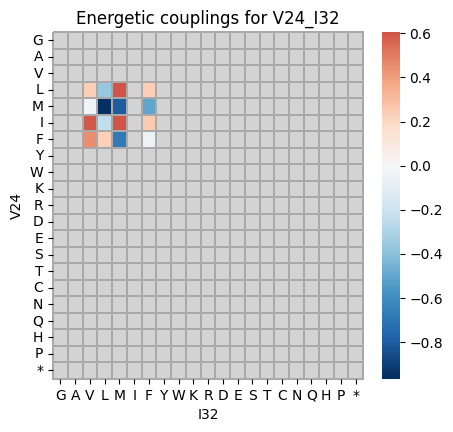

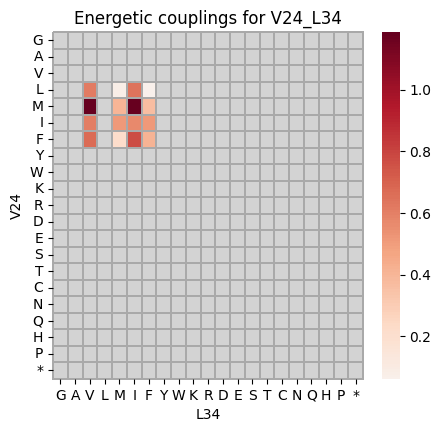

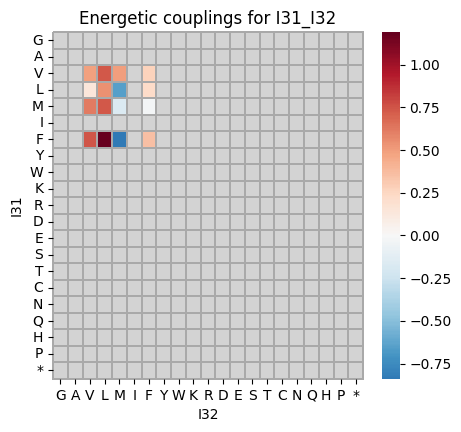

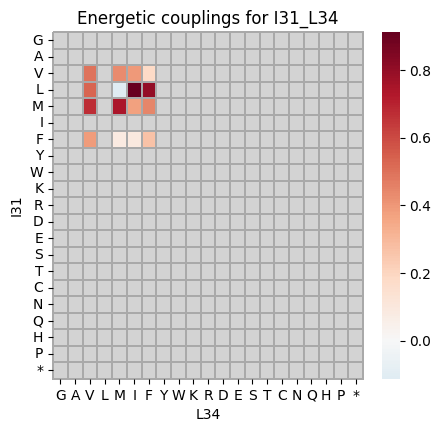

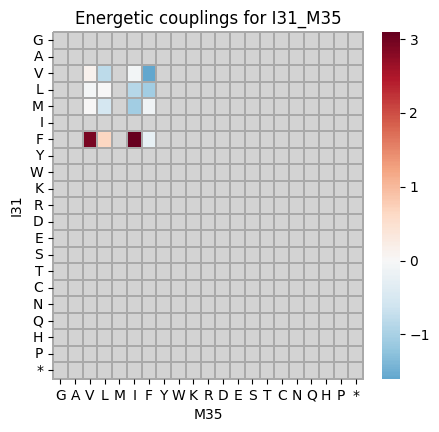

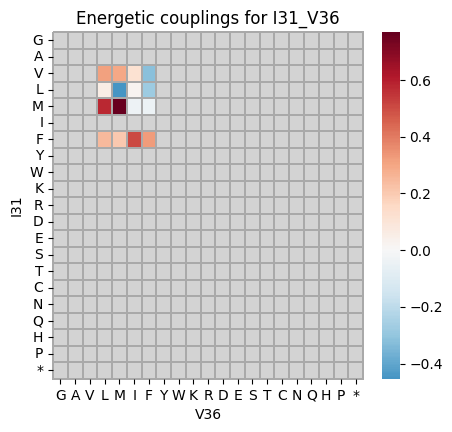

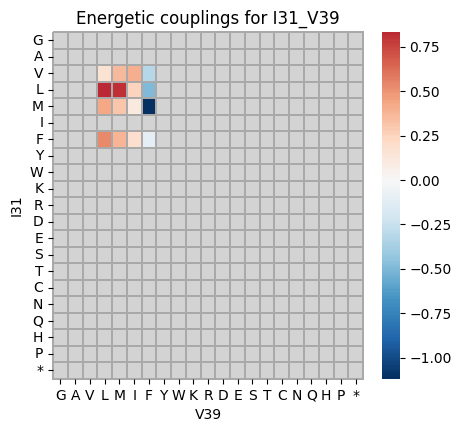

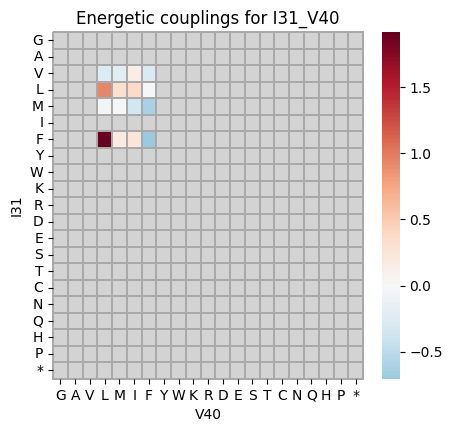

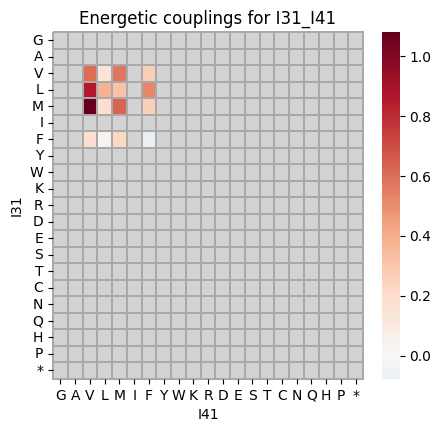

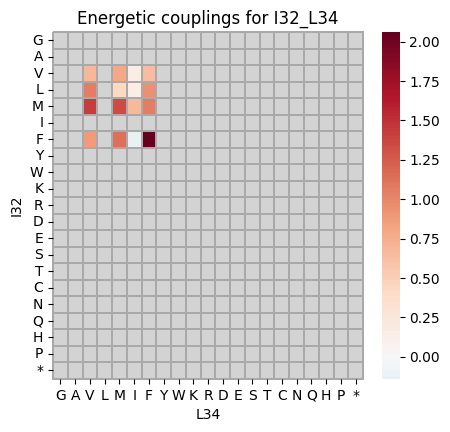

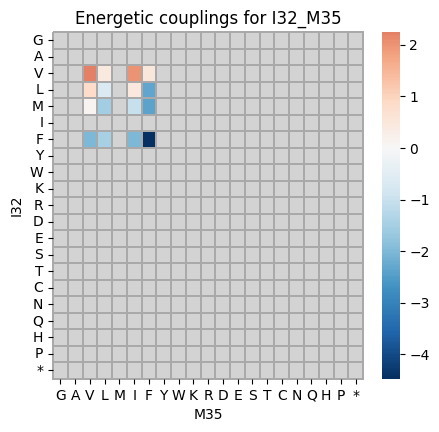

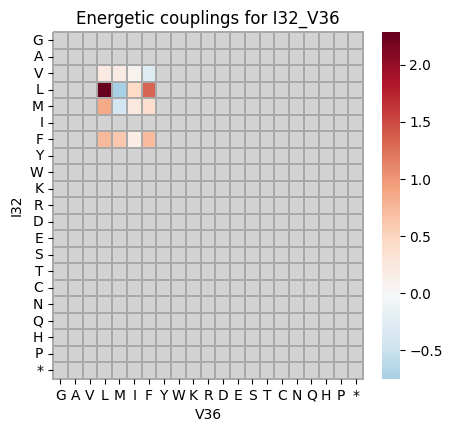

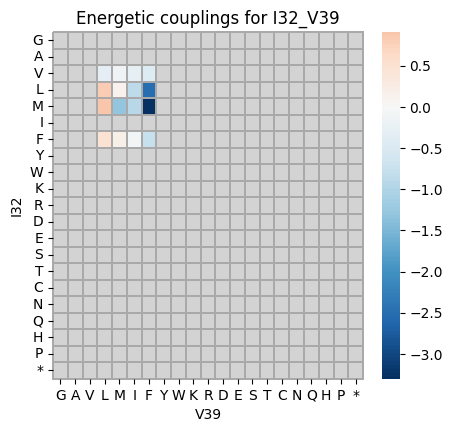

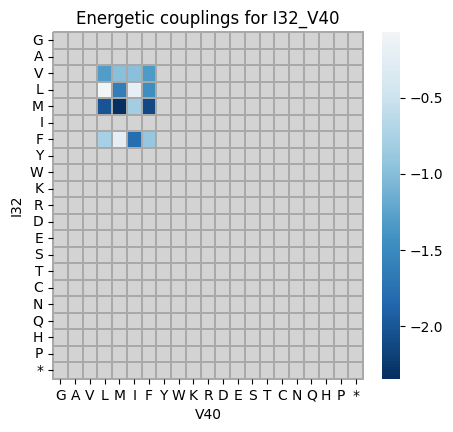

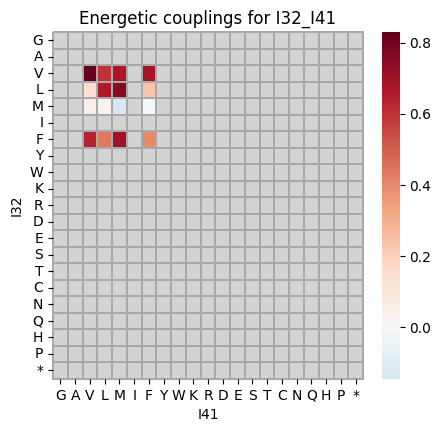

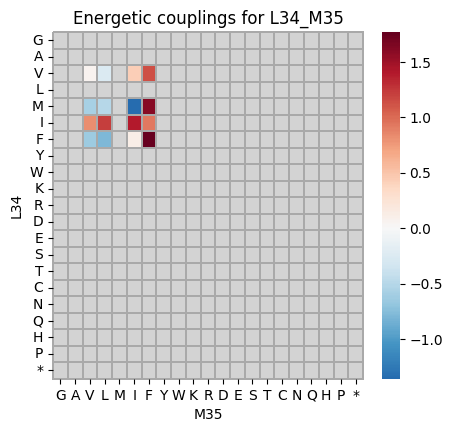

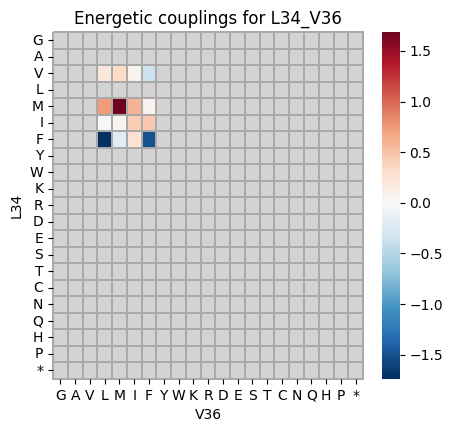

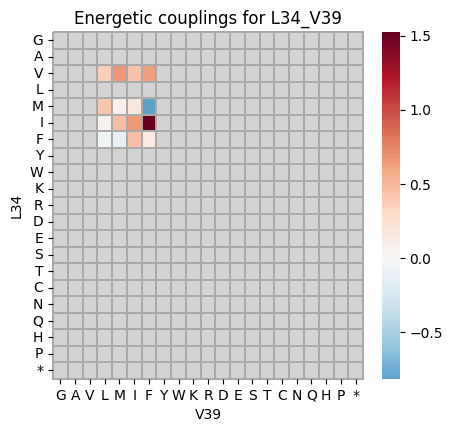

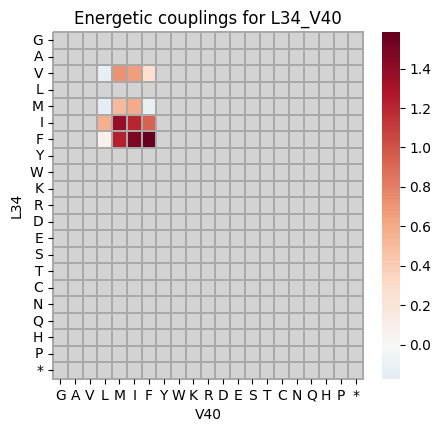

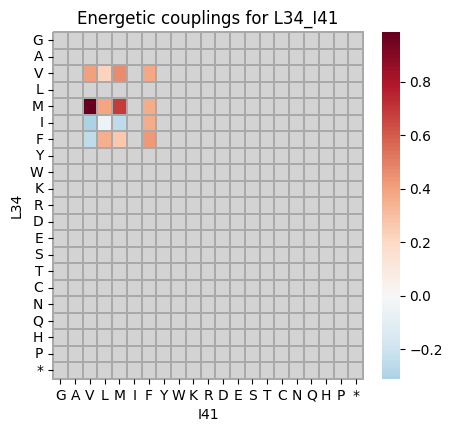

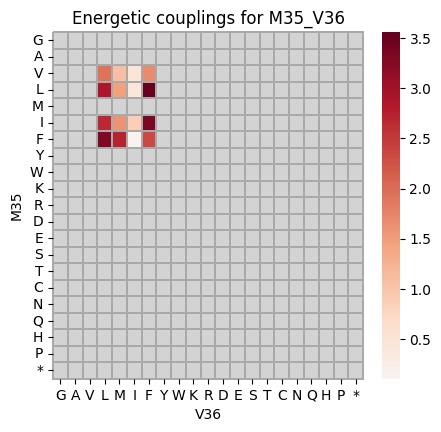

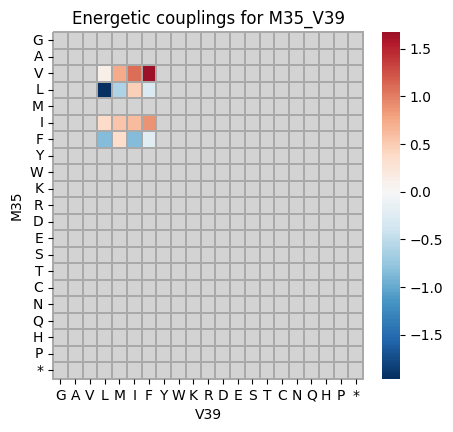

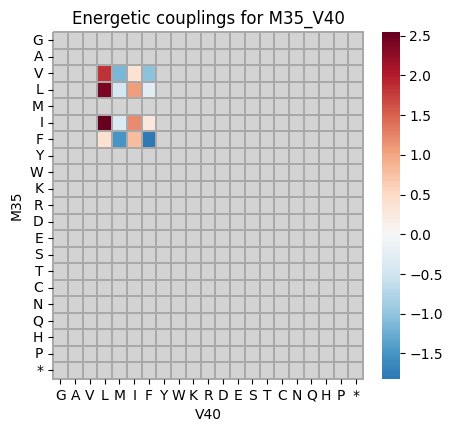

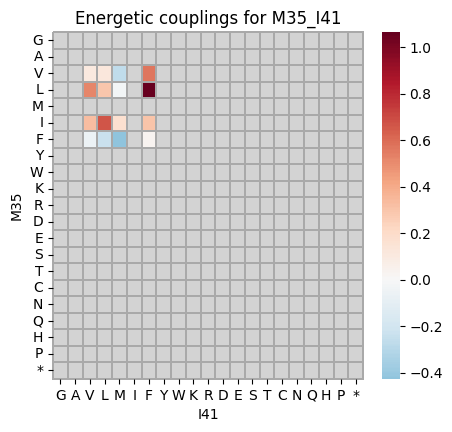

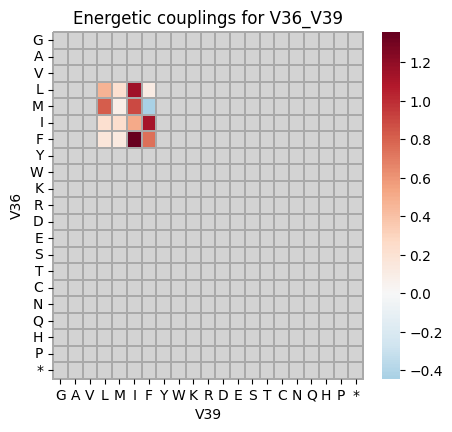

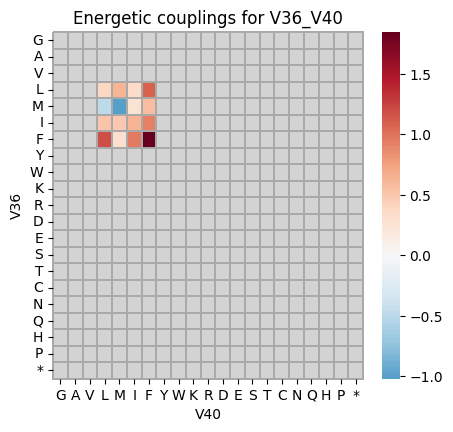

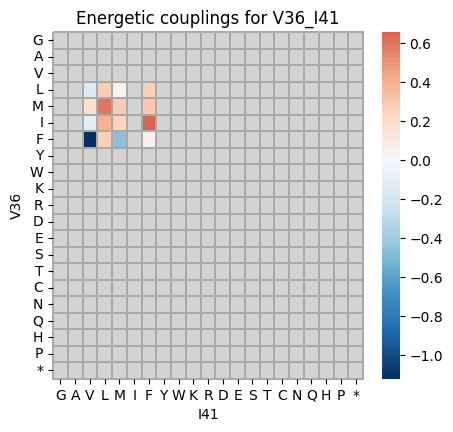

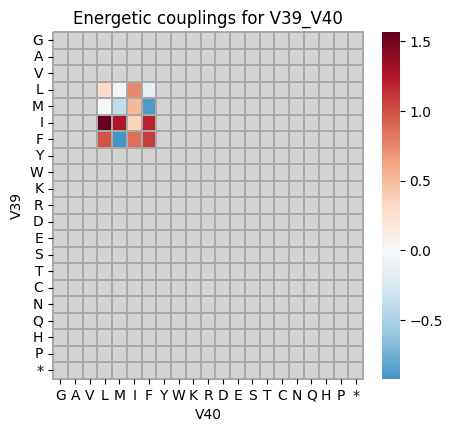

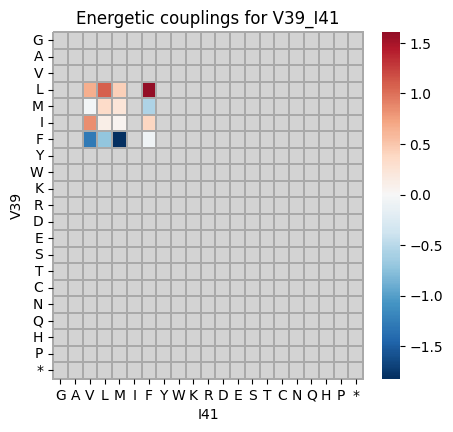

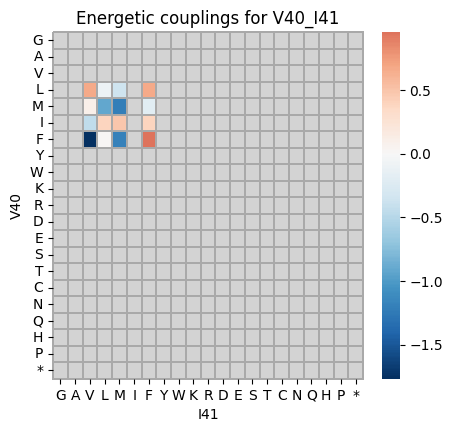

In [136]:
for mut_combination in not_empty_dfs_keys:
    
    fig = plt.figure(figsize=(5, 4.5))
    
    
    sns.heatmap(ddE_df_2nd_order_terms['all'][mut_combination], cmap=cmap_ddE_2nd_order_terms, 
                #vmin = ddE_df_mean_kcalmol.fillna(0, inplace=False).to_numpy().min(),
                #vmax = 5,
                mask=masks_ddE_2nd_order_terms['all'][mut_combination],
                linewidths=0.002814, linecolor='darkgrey', clip_on=False,
                center=0)
    
    plt.yticks(rotation=0, 
               #fontsize=2
              )
    
    plt.ylabel(mut_combination.split('_')[0])
    plt.xlabel(mut_combination.split('_')[1])
    
    #plt.xticks(fontsize=2) 
    
    plt.title('Energetic couplings for ' +  mut_combination)


/tmp/ipykernel_2483597/691418731.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(2, 1.5))


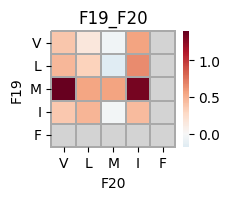

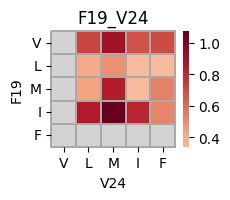

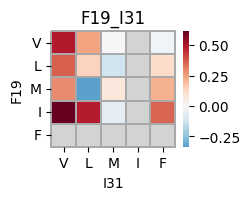

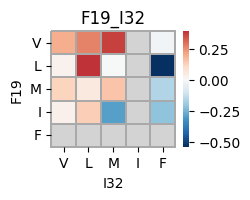

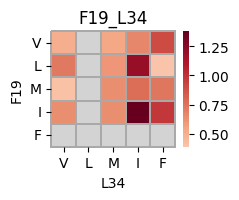

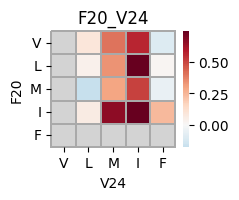

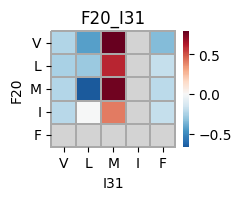

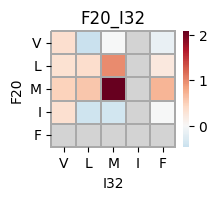

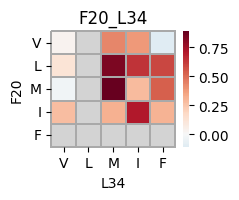

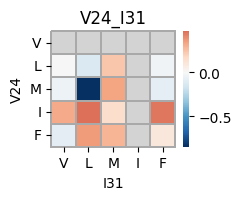

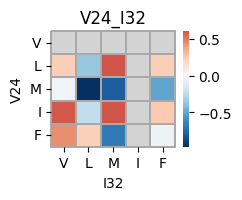

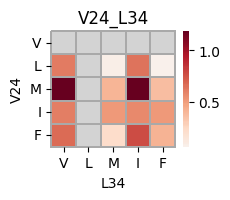

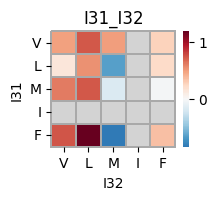

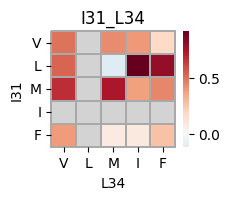

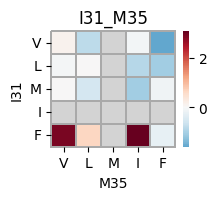

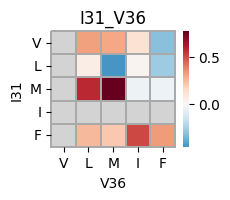

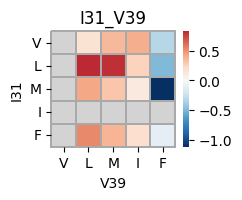

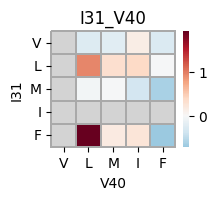

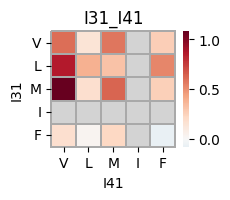

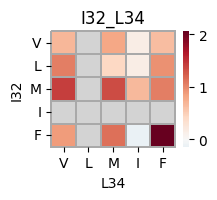

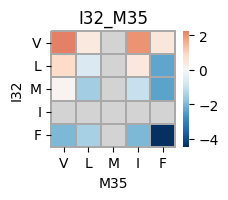

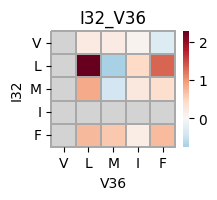

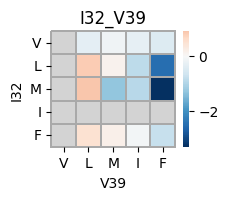

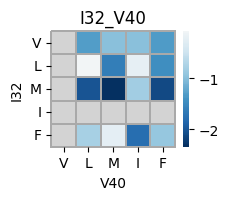

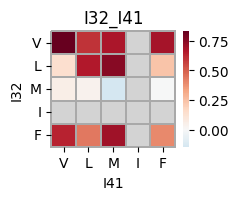

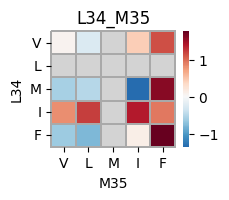

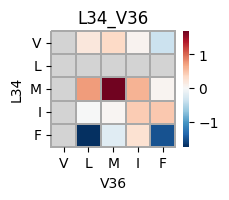

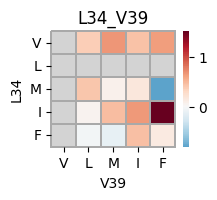

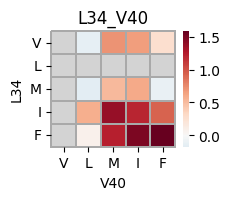

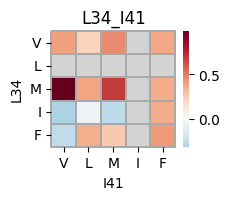

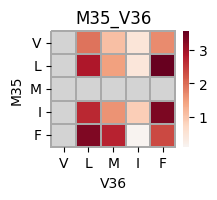

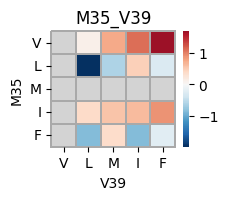

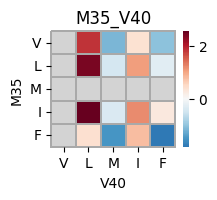

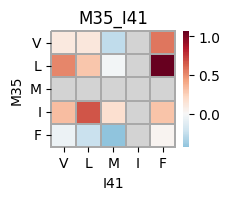

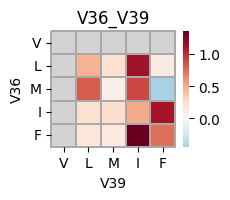

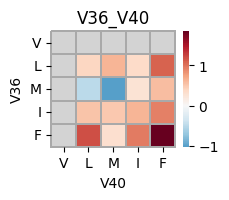

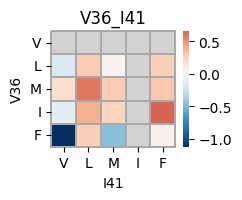

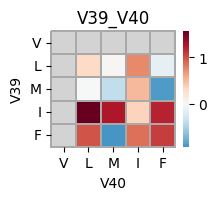

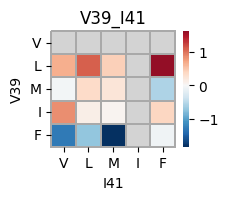

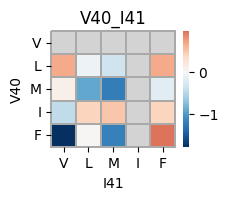

In [137]:
for mut_combination in not_empty_dfs_keys:
    
    fig = plt.figure(figsize=(2, 1.5))
    
    
    rows2display = ['V','L','M','I','F']
    cols2display = ['V','L','M','I','F']
    
    
    sns.heatmap(ddE_df_2nd_order_terms['all'][mut_combination].loc[rows2display, cols2display], cmap=cmap_ddE_2nd_order_terms, 
                #vmin = ddE_df_mean_kcalmol.fillna(0, inplace=False).to_numpy().min(),
                #vmax = 5,
                mask=masks_ddE_2nd_order_terms['all'][mut_combination].loc[rows2display, cols2display],
                linewidths=0.002814, linecolor='darkgrey', clip_on=False,
                center=0)
    
    plt.yticks(rotation=0, 
               #fontsize=2
              )
    
    plt.ylabel(mut_combination.split('_')[0])
    plt.xlabel(mut_combination.split('_')[1])
    
    #plt.xticks(fontsize=2) 
    
    plt.title(mut_combination)

    #plt.savefig('./figures/20240722_energetic_couplings_' + mut_combination + '.pdf',
    #           bbox_inches = 'tight')

In [138]:
weights_Nucleation_2nd_order['ddEa_recentered']

0      0.619507
1      0.600456
2      0.382831
3      2.544244
4      1.914015
         ...   
635   -0.107525
636    0.589749
637   -0.022368
638    1.053866
639    0.367689
Name: ddEa_recentered, Length: 640, dtype: float64

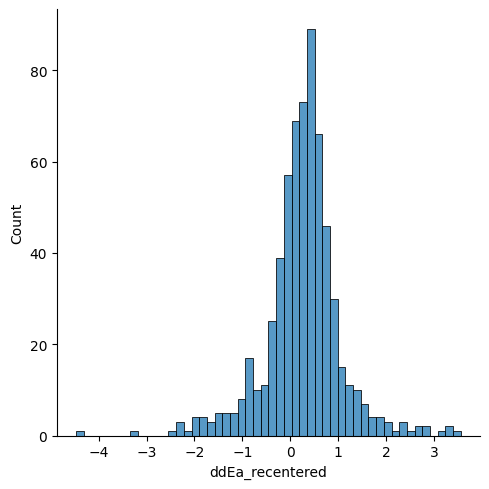

In [141]:
sns.displot(weights_Nucleation_2nd_order['ddEa_recentered'])

In [142]:
weights_Nucleation_2nd_order[(weights_Nucleation_2nd_order['ddEa_recentered'] < 1) & (weights_Nucleation_2nd_order['ddEa_recentered'] > -1)]


,id,id_ref,Pos,Pos_ref,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,...,mean,std,ci95,trait_name,mean_kcal/mol,std_kcal/mol,ci95_kcal/mol,ddEa,ddEa_recentered,std_scaled
0,V36L_V40M,V36L_V40M,36_40,36_40,-0.007173,0.308364,-0.107993,-0.272195,-0.201784,-0.379566,...,-0.169164,0.213807,0.838125,Nucleation,-0.101847,0.128725,0.504602,0.101847,0.619507,0.309403
1,I31V_I41V,I31V_I41V,31_41,31_41,-0.285702,-0.127356,-0.068321,-0.074500,-0.288390,-0.105110,...,-0.155999,0.099805,0.391237,Nucleation,-0.093921,0.060089,0.235548,0.093921,0.600456,0.144429
2,F19I_F20V,F19I_F20V,19_20,19_20,-0.204647,0.066053,0.290241,0.033616,0.044246,-0.093565,...,-0.005613,0.137510,0.539038,Nucleation,-0.003379,0.082789,0.324534,0.003379,0.382831,0.198992
5,M35I_V40F,M35I_V40F,35_40,35_40,0.043280,0.568651,0.386600,0.046156,-0.194208,0.049527,...,0.077236,0.235291,0.922341,Nucleation,0.046501,0.141660,0.555306,-0.046501,0.262939,0.340492
6,L34F_I41F,L34F_I41F,34_41,34_41,0.293182,0.261151,-0.085708,-0.451143,-0.294701,-0.173344,...,-0.036841,0.244314,0.957712,Nucleation,-0.022181,0.147092,0.576601,0.022181,0.428022,0.353550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,L34F_V39I,L34F_V39I,34_39,34_39,0.088630,-0.173401,-0.143823,0.093569,-0.044567,0.094270,...,-0.061290,0.124086,0.486416,Nucleation,-0.036900,0.074707,0.292852,0.036900,0.463402,0.179566
635,F20V_L34F,F20V_L34F,20_34,20_34,0.297921,0.329733,0.396647,0.148138,0.351929,0.206056,...,0.333239,0.116632,0.457198,Nucleation,0.200630,0.070220,0.275261,-0.200630,-0.107525,0.168780
636,L34M_V36I,L34M_V36I,34_36,34_36,-0.093798,-0.093373,-0.094947,-0.130022,-0.255219,-0.146849,...,-0.148600,0.124256,0.487082,Nucleation,-0.089466,0.074809,0.293253,0.089466,0.589749,0.179812
637,I31M_V40M,I31M_V40M,31_40,31_40,0.347809,0.154206,0.092261,0.251844,0.468843,0.331124,...,0.274393,0.121982,0.478168,Nucleation,0.165201,0.073440,0.287886,-0.165201,-0.022368,0.176521


In [143]:
weights_Nucleation_2nd_order

,id,id_ref,Pos,Pos_ref,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,...,mean,std,ci95,trait_name,mean_kcal/mol,std_kcal/mol,ci95_kcal/mol,ddEa,ddEa_recentered,std_scaled
0,V36L_V40M,V36L_V40M,36_40,36_40,-0.007173,0.308364,-0.107993,-0.272195,-0.201784,-0.379566,...,-0.169164,0.213807,0.838125,Nucleation,-0.101847,0.128725,0.504602,0.101847,0.619507,0.309403
1,I31V_I41V,I31V_I41V,31_41,31_41,-0.285702,-0.127356,-0.068321,-0.074500,-0.288390,-0.105110,...,-0.155999,0.099805,0.391237,Nucleation,-0.093921,0.060089,0.235548,0.093921,0.600456,0.144429
2,F19I_F20V,F19I_F20V,19_20,19_20,-0.204647,0.066053,0.290241,0.033616,0.044246,-0.093565,...,-0.005613,0.137510,0.539038,Nucleation,-0.003379,0.082789,0.324534,0.003379,0.382831,0.198992
3,M35I_V40L,M35I_V40L,35_40,35_40,-1.838146,-1.267114,-1.587382,-0.874730,-1.422868,-1.258638,...,-1.499219,0.328204,1.286558,Nucleation,-0.902621,0.197599,0.774586,0.902621,2.544244,0.474947
4,I31F_V40L,I31F_V40L,31_40,31_40,-0.936283,-1.122599,-1.695565,-1.047511,-1.479724,-1.050488,...,-1.063711,0.327143,1.282401,Nucleation,-0.640419,0.196960,0.772084,0.640419,1.914015,0.473412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,F20V_L34F,F20V_L34F,20_34,20_34,0.297921,0.329733,0.396647,0.148138,0.351929,0.206056,...,0.333239,0.116632,0.457198,Nucleation,0.200630,0.070220,0.275261,-0.200630,-0.107525,0.168780
636,L34M_V36I,L34M_V36I,34_36,34_36,-0.093798,-0.093373,-0.094947,-0.130022,-0.255219,-0.146849,...,-0.148600,0.124256,0.487082,Nucleation,-0.089466,0.074809,0.293253,0.089466,0.589749,0.179812
637,I31M_V40M,I31M_V40M,31_40,31_40,0.347809,0.154206,0.092261,0.251844,0.468843,0.331124,...,0.274393,0.121982,0.478168,Nucleation,0.165201,0.073440,0.287886,-0.165201,-0.022368,0.176521
638,I32M_L34F,I32M_L34F,32_34,32_34,-0.894396,-0.766055,-0.524387,-0.299532,-0.329063,-0.572234,...,-0.469320,0.230045,0.901778,Nucleation,-0.282559,0.138501,0.542925,0.282559,1.053866,0.332901


In [144]:
627/640

0.9796875

In [145]:
weights_Nucleation_2nd_order[(weights_Nucleation_2nd_order['ddEa_recentered'] < 0.5) & (weights_Nucleation_2nd_order['ddEa_recentered'] > -0.5)]


,id,id_ref,Pos,Pos_ref,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,...,mean,std,ci95,trait_name,mean_kcal/mol,std_kcal/mol,ci95_kcal/mol,ddEa,ddEa_recentered,std_scaled
2,F19I_F20V,F19I_F20V,19_20,19_20,-0.204647,0.066053,0.290241,0.033616,0.044246,-0.093565,...,-0.005613,0.137510,0.539038,Nucleation,-0.003379,0.082789,0.324534,0.003379,0.382831,0.198992
5,M35I_V40F,M35I_V40F,35_40,35_40,0.043280,0.568651,0.386600,0.046156,-0.194208,0.049527,...,0.077236,0.235291,0.922341,Nucleation,0.046501,0.141660,0.555306,-0.046501,0.262939,0.340492
6,L34F_I41F,L34F_I41F,34_41,34_41,0.293182,0.261151,-0.085708,-0.451143,-0.294701,-0.173344,...,-0.036841,0.244314,0.957712,Nucleation,-0.022181,0.147092,0.576601,0.022181,0.428022,0.353550
13,L34M_I41F,L34M_I41F,34_41,34_41,0.096434,0.028910,0.057517,-0.200827,-0.119157,0.103558,...,0.004926,0.122007,0.478268,Nucleation,0.002966,0.073456,0.287947,-0.002966,0.367580,0.176558
15,M35V_V36I,M35V_V36I,35_36,35_36,-0.071849,0.002279,0.019602,0.031412,-0.081914,-0.054247,...,-0.071037,0.095434,0.374101,Nucleation,-0.042769,0.057457,0.225232,0.042769,0.477507,0.138103
18,I32F_V40M,I32F_V40M,32_40,32_40,0.575407,0.054552,0.231010,0.629834,0.287578,0.708985,...,0.416547,0.236043,0.925288,Nucleation,0.250786,0.142112,0.557080,-0.250786,-0.228080,0.341580
19,I31F_V40I,I31F_V40I,31_40,31_40,0.261806,-0.007203,-0.077506,0.009246,0.189363,0.347423,...,0.083058,0.147593,0.578564,Nucleation,0.050006,0.088860,0.348331,-0.050006,0.254514,0.213583
24,V36M_V39F,V36M_V39F,36_39,36_39,0.570625,0.426698,0.513339,0.677481,0.762231,0.373025,...,0.565012,0.177332,0.695140,Nucleation,0.340172,0.106764,0.418517,-0.340172,-0.442927,0.256618
25,F20I_V24F,F20I_V24F,20_24,20_24,0.121928,-0.033047,0.175307,-0.000673,0.170137,0.291939,...,0.092515,0.117981,0.462486,Nucleation,0.055700,0.071032,0.278445,-0.055700,0.240828,0.170732
26,F20V_I31F,F20V_I31F,20_31,20_31,0.563950,0.423772,0.645788,0.425863,0.427015,0.559950,...,0.497541,0.139172,0.545554,Nucleation,0.299550,0.083790,0.328457,-0.299550,-0.345288,0.201397


In [146]:
weights_Nucleation_2nd_order_high = weights_Nucleation_2nd_order[(weights_Nucleation_2nd_order['ddEa_recentered'] > 1) | (weights_Nucleation_2nd_order['ddEa_recentered'] < -1)]


In [147]:
weights_Nucleation_2nd_order_high.shape

(105, 25)

In [148]:
weights_Nucleation_2nd_order_high['Pos_ref'].value_counts()

Pos_ref
35_36    12
32_35    10
35_40     9
32_40     8
32_34     6
34_35     6
31_35     5
34_40     5
39_40     4
36_40     4
39_41     4
34_36     3
36_39     3
40_41     3
35_39     3
32_39     3
24_34     2
19_34     2
19_20     2
32_36     2
31_40     1
19_24     1
31_41     1
36_41     1
31_39     1
31_32     1
34_39     1
35_41     1
20_32     1
Name: count, dtype: int64

In [149]:
weights_Nucleation_2nd_order_high['Pos_1'] = [pos_ref.split('_')[0] for pos_ref in list(weights_Nucleation_2nd_order_high['Pos_ref'])]
weights_Nucleation_2nd_order_high['Pos_2'] = [pos_ref.split('_')[1] for pos_ref in list(weights_Nucleation_2nd_order_high['Pos_ref'])]



/tmp/ipykernel_2483597/1317259159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weights_Nucleation_2nd_order_high['Pos_1'] = [pos_ref.split('_')[0] for pos_ref in list(weights_Nucleation_2nd_order_high['Pos_ref'])]
/tmp/ipykernel_2483597/1317259159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weights_Nucleation_2nd_order_high['Pos_2'] = [pos_ref.split('_')[1] for pos_ref in list(weights_Nucleation_2nd_order_high['Pos_ref'])]


In [150]:
weights_Nucleation_2nd_order_high['Pos_1'].value_counts()

Pos_1
32    29
35    25
34    15
31     9
39     8
36     8
19     5
40     3
24     2
20     1
Name: count, dtype: int64

In [151]:
weights_Nucleation_2nd_order_high['Pos_2'].value_counts()

Pos_2
40    31
35    21
36    17
39    11
34    10
41    10
32     2
20     2
24     1
Name: count, dtype: int64

In [153]:
#weights_Nucleation_2nd_order_high

In [154]:
weights_Nucleation_2nd_order_high['old_new_aa_1_2'] = [mut_id.split('_')[0][0] + '-' + mut_id.split('_')[0][-1] + '_' + mut_id.split('_')[1][0] + '-' + mut_id.split('_')[1][-1] for mut_id in weights_Nucleation_2nd_order_high['id']]


/tmp/ipykernel_2483597/947407222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weights_Nucleation_2nd_order_high['old_new_aa_1_2'] = [mut_id.split('_')[0][0] + '-' + mut_id.split('_')[0][-1] + '_' + mut_id.split('_')[1][0] + '-' + mut_id.split('_')[1][-1] for mut_id in weights_Nucleation_2nd_order_high['id']]


In [155]:
weights_Nucleation_2nd_order_high['old_new_aa_1_2'].value_counts()

old_new_aa_1_2
I-M_V-F    3
I-L_V-F    3
M-L_V-L    3
V-F_I-V    3
M-V_V-F    3
M-I_V-L    2
I-F_M-I    2
M-F_V-F    2
M-V_V-L    2
L-F_V-F    2
M-F_V-M    2
I-L_M-F    2
I-M_M-I    2
I-F_M-V    2
V-F_I-M    2
V-I_V-F    2
I-M_V-M    2
V-F_V-F    2
M-V_V-M    2
V-I_V-M    1
M-L_V-I    1
I-F_V-I    1
I-L_V-L    1
I-M_M-F    1
I-M_L-M    1
V-F_V-L    1
F-L_L-I    1
V-L_I-L    1
L-I_V-F    1
F-M_F-V    1
I-V_M-V    1
F-M_F-I    1
L-I_M-I    1
L-M_M-I    1
I-F_L-M    1
I-M_L-V    1
V-M_V-M    1
I-M_V-L    1
L-I_V-I    1
F-M_I-M    1
V-F_V-I    1
I-F_I-L    1
L-M_V-M    1
I-F_M-L    1
V-L_I-F    1
V-M_L-V    1
M-L_I-F    1
L-V_M-F    1
L-F_V-I    1
I-V_M-I    1
F-I_L-I    1
L-F_M-F    1
V-I_V-L    1
I-V_V-F    1
M-I_V-M    1
M-L_V-M    1
I-L_L-V    1
F-I_V-M    1
I-F_L-F    1
M-I_V-I    1
L-F_V-L    1
I-F_M-F    1
M-V_V-I    1
M-F_V-L    1
L-F_V-M    1
V-L_V-F    1
I-V_V-L    1
V-L_V-I    1
V-M_I-M    1
L-M_M-F    1
M-L_V-F    1
I-L_V-M    1
L-I_V-M    1
I-M_I-V    1
I-F_V-L    1
L-I_M-L   

In [156]:
weights_Nucleation_2nd_order_high['Pos_2'].value_counts()

Pos_2
40    31
35    21
36    17
39    11
34    10
41    10
32     2
20     2
24     1
Name: count, dtype: int64

In [158]:
#weights_Nucleation_2nd_order_high

In [159]:
weights_Nucleation_2nd_order_high['keys_for_plotting_pos'] = [mut_id.split('_')[0][:-1] + '_' + mut_id.split('_')[1][:-1] for mut_id in list(weights_Nucleation_2nd_order_high['id'])]


/tmp/ipykernel_2483597/1309442901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weights_Nucleation_2nd_order_high['keys_for_plotting_pos'] = [mut_id.split('_')[0][:-1] + '_' + mut_id.split('_')[1][:-1] for mut_id in list(weights_Nucleation_2nd_order_high['id'])]


In [162]:
#weights_Nucleation_2nd_order_high.sort_values(by=['ddEa_recentered'])

In [161]:
np.unique(weights_Nucleation_2nd_order_high['keys_for_plotting_pos'])

array(['F19_F20', 'F19_L34', 'F19_V24', 'F20_I32', 'I31_I32', 'I31_I41',
       'I31_M35', 'I31_V39', 'I31_V40', 'I32_L34', 'I32_M35', 'I32_V36',
       'I32_V39', 'I32_V40', 'L34_M35', 'L34_V36', 'L34_V39', 'L34_V40',
       'M35_I41', 'M35_V36', 'M35_V39', 'M35_V40', 'V24_L34', 'V36_I41',
       'V36_V39', 'V36_V40', 'V39_I41', 'V39_V40', 'V40_I41'],
      dtype=object)

In [163]:
selected_high_inter_ids = list(np.unique(weights_Nucleation_2nd_order_high['keys_for_plotting_pos']))

In [164]:
ddE_df_2nd_order_terms.keys()

dict_keys(['all'])

In [165]:
groups_interactions

['all']

In [166]:
mean_interaction_scores = {}

values_2nd_order_terms = {}

for inter_group in groups_interactions:
    
    print(inter_group)
    
    values_2nd_order_terms[inter_group] = {}
    
    # in this case there will only be one mean_interaction_scores
    mean_interaction_scores[inter_group] = pd.DataFrame(columns = ['mean_ddEa'], index = not_empty_dfs_keys)
    
    
    for mut_combination in not_empty_dfs_keys:

        # calculate number of non nan values to use as normalising factor
        values_all = ddE_df_2nd_order_terms['all'][mut_combination].to_numpy()
        values_all = [x for xs in values_all for x in xs]
        values_all = [elem for elem in values_all if str(elem) != 'nan']
        n_values_all = len(values_all)
        
        # get values of a particular group
        values = ddE_df_2nd_order_terms[inter_group][mut_combination].to_numpy()
        # flatten
        values = [x for xs in values for x in xs]
        # get rid of nans
        values = [elem for elem in values if str(elem) != 'nan']
        
        values_2nd_order_terms[inter_group][mut_combination] = values
                
        # normalisation 
        # consider by module / strength of interaction when looking at 'all' or phi analysis related groups
        values = [abs(elem) for elem in values]
            
        if len(values) > 0:
            mean_interaction_scores[inter_group].loc[mut_combination,'mean_ddEa'] = np.sum(values) / n_values_all # here it's equivalent to doing np.mean(values)
        else:
            mean_interaction_scores[inter_group].loc[mut_combination,'mean_ddEa'] = np.nan
            

all


In [167]:
len(not_empty_dfs_keys)

40

In [168]:
# how many interactions in total?

# was 4511 with all DTS datasets

# get values of a particular group
values = values_2nd_order_terms['all'].values()
# flatten
values = [x for xs in values for x in xs]
len(values)

640

In [170]:
Ab_positions = [str(i+1) for i in range(len(AB_WT))]

interaction_scores_positions = {}

for inter_group in groups_interactions:

    interaction_scores_positions[inter_group] = {}

    for pos_i in Ab_positions:
        for pos_j in Ab_positions:
            interaction_scores_positions[inter_group][pos_i + '_' + pos_j] = []

In [171]:
for inter_group in groups_interactions:
    for mut_combination in not_empty_dfs_keys:
    
        pos_i = mut_combination.split('_')[0][1:]
        pos_j = mut_combination.split('_')[1][1:]

        interaction_scores_positions[inter_group][pos_i + '_' + pos_j].append(mean_interaction_scores[inter_group].loc[mut_combination,
                                                                                                                       'mean_ddEa'
                                                                                                                      #'sum_ddEa'
                                                                                                                      ])

In [172]:
interacting_position_combinations = {}

for inter_group in groups_interactions: 
    interacting_position_combinations[inter_group] = []
    
    for key in list(interaction_scores_positions[inter_group].keys()):
        if len(interaction_scores_positions[inter_group][key]) > 0:
            interacting_position_combinations[inter_group].append(key)

In [173]:
len(interacting_position_combinations['all'])

40

In [174]:
dfs_to_plot_interactions = {}

for inter_group in groups_interactions:
    dfs_to_plot_interactions[inter_group] = pd.DataFrame(index = Ab_positions[::-1], columns = Ab_positions)

In [175]:
for inter_group in groups_interactions:
    for pos_i in Ab_positions:
        for pos_j in Ab_positions:

            curr_position_combination = pos_i + '_' + pos_j

            if curr_position_combination in interacting_position_combinations[inter_group]:
                dfs_to_plot_interactions[inter_group].loc[pos_i, pos_j] = interaction_scores_positions[inter_group][curr_position_combination][0]



In [176]:
for inter_group in groups_interactions:
    for col in list(dfs_to_plot_interactions[inter_group].columns):
        dfs_to_plot_interactions[inter_group][col] = dfs_to_plot_interactions[inter_group][col].astype(float)

In [177]:
cmap_universal = matplotlib.colormaps.get('RdBu_r')
cmap_universal.set_bad("lightgrey")

masks_interactions = {}

for inter_group in groups_interactions:
    masks_interactions[inter_group] = dfs_to_plot_interactions[inter_group].isnull()


In [178]:
groups_interactions

['all']

In [179]:
weights_Nucleation.columns

Index(['id_ref', 'Pos', 'Pos_ref', 'fold_1', 'fold_2', 'fold_3', 'fold_4',
       'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9', 'fold_10', 'n',
       'mean', 'std', 'ci95', 'trait_name', 'mean_kcal/mol', 'std_kcal/mol',
       'ci95_kcal/mol', 'ddEa', 'ddEa_recentered', 'std_scaled', 'all'],
      dtype='object')